In [80]:
import requests
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

%matplotlib inline

## Updating the dataset

In [81]:
time_series_ncov_confirmed = requests.get('https://data.humdata.org/hxlproxy/data/download/time_series-ncov-Confirmed.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Binfected%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv')

with open('../data/time_series-ncov-Confirmed.csv', 'wb') as f:
    f.write(time_series_ncov_confirmed.content)

In [82]:
time_series_ncov_deaths = requests.get('https://data.humdata.org/hxlproxy/data/download/time_series-ncov-Deaths.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Bkilled%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv')

with open('../data/time_series-ncov-Death.csv', 'wb') as f:
    f.write(time_series_ncov_deaths.content)

## Reading and organizing the dataset

In [89]:
corona_cases = pd.read_csv('../data/time_series-ncov-Confirmed.csv', parse_dates=['Date'], skiprows=[1])
corona_cases = corona_cases.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_cases"})
corona_cases = corona_cases.fillna(0)
corona_cases.location[corona_cases.location == 'US'] = 'United States of America'
corona_cases = corona_cases[corona_cases.total_cases > 0]
corona_cases = corona_cases.sort_values(['date', 'total_cases'])
corona_cases.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_cases
3285,Anhui,China,31.8257,117.2264,2020-01-22,1.0
3471,Fujian,China,26.0789,117.9874,2020-01-22,1.0
3719,Guizhou,China,26.8154,106.8748,2020-01-22,1.0
3843,Hebei,China,39.5490,116.1306,2020-01-22,1.0
4277,Jiangsu,China,32.9711,119.4550,2020-01-22,1.0


In [90]:
corona_cases.shape

(7867, 6)

In [91]:
death_dataset = pd.read_csv('../data/time_series-ncov-Death.csv', parse_dates=['Date'], skiprows=[1])
death_dataset = death_dataset.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_deaths"})
death_dataset = death_dataset.fillna(0)
death_dataset.location[death_dataset.location == 'US'] = 'United States of America'
death_dataset = death_dataset[death_dataset.total_deaths > 0]

death_dataset = death_dataset.sort_values(['date', 'total_deaths'])
death_dataset.head()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,province,location,Lat,Long,date,total_deaths
4091,Hubei,China,30.9756,112.2707,2020-01-22,17.0
3842,Hebei,China,39.5490,116.1306,2020-01-23,1.0
4090,Hubei,China,30.9756,112.2707,2020-01-23,17.0
3841,Hebei,China,39.5490,116.1306,2020-01-24,1.0
3903,Heilongjiang,China,47.8620,127.7615,2020-01-24,1.0


In [92]:
# Summing up the total_cases for the countries that are seprated by province

countries = corona_cases[corona_cases.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': corona_cases[corona_cases.location == country].date.max(),
        'total_cases': sum(corona_cases.total_cases[(corona_cases.location == country) & (corona_cases.date == corona_cases[corona_cases.location == country].date.max())])
    }
    corona_cases = corona_cases.append(total, ignore_index=True)


# corona_cases = corona_cases.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 


In [93]:
# Summing up the total_cases for the countries that are seprated by province

countries = death_dataset[death_dataset.province != 0].location.unique().tolist()
for country in countries:
    
    total = {
        'location': country,
        'province': country,
        'date': death_dataset[death_dataset.location == country].date.max(),
        'total_deaths': sum(death_dataset.total_deaths[(death_dataset.location == country) & (death_dataset.date == death_dataset[death_dataset.location == country].date.max())])
    }
    death_dataset = death_dataset.append(total, ignore_index=True)


# death_dataset = death_dataset.sort_values(["date", 'location']).drop_duplicates(subset =['location'], keep = 'last') 



In [9]:
# corona_cases = corona_cases.sort_values(["date", 'location']).drop_duplicates(subset =['location', 'date'], keep = 'last') 
# death_dataset = death_dataset.sort_values(["date", 'location']).drop_duplicates(subset =['location', 'date'], keep = 'last') 

## Cases of Corona virus excluding China

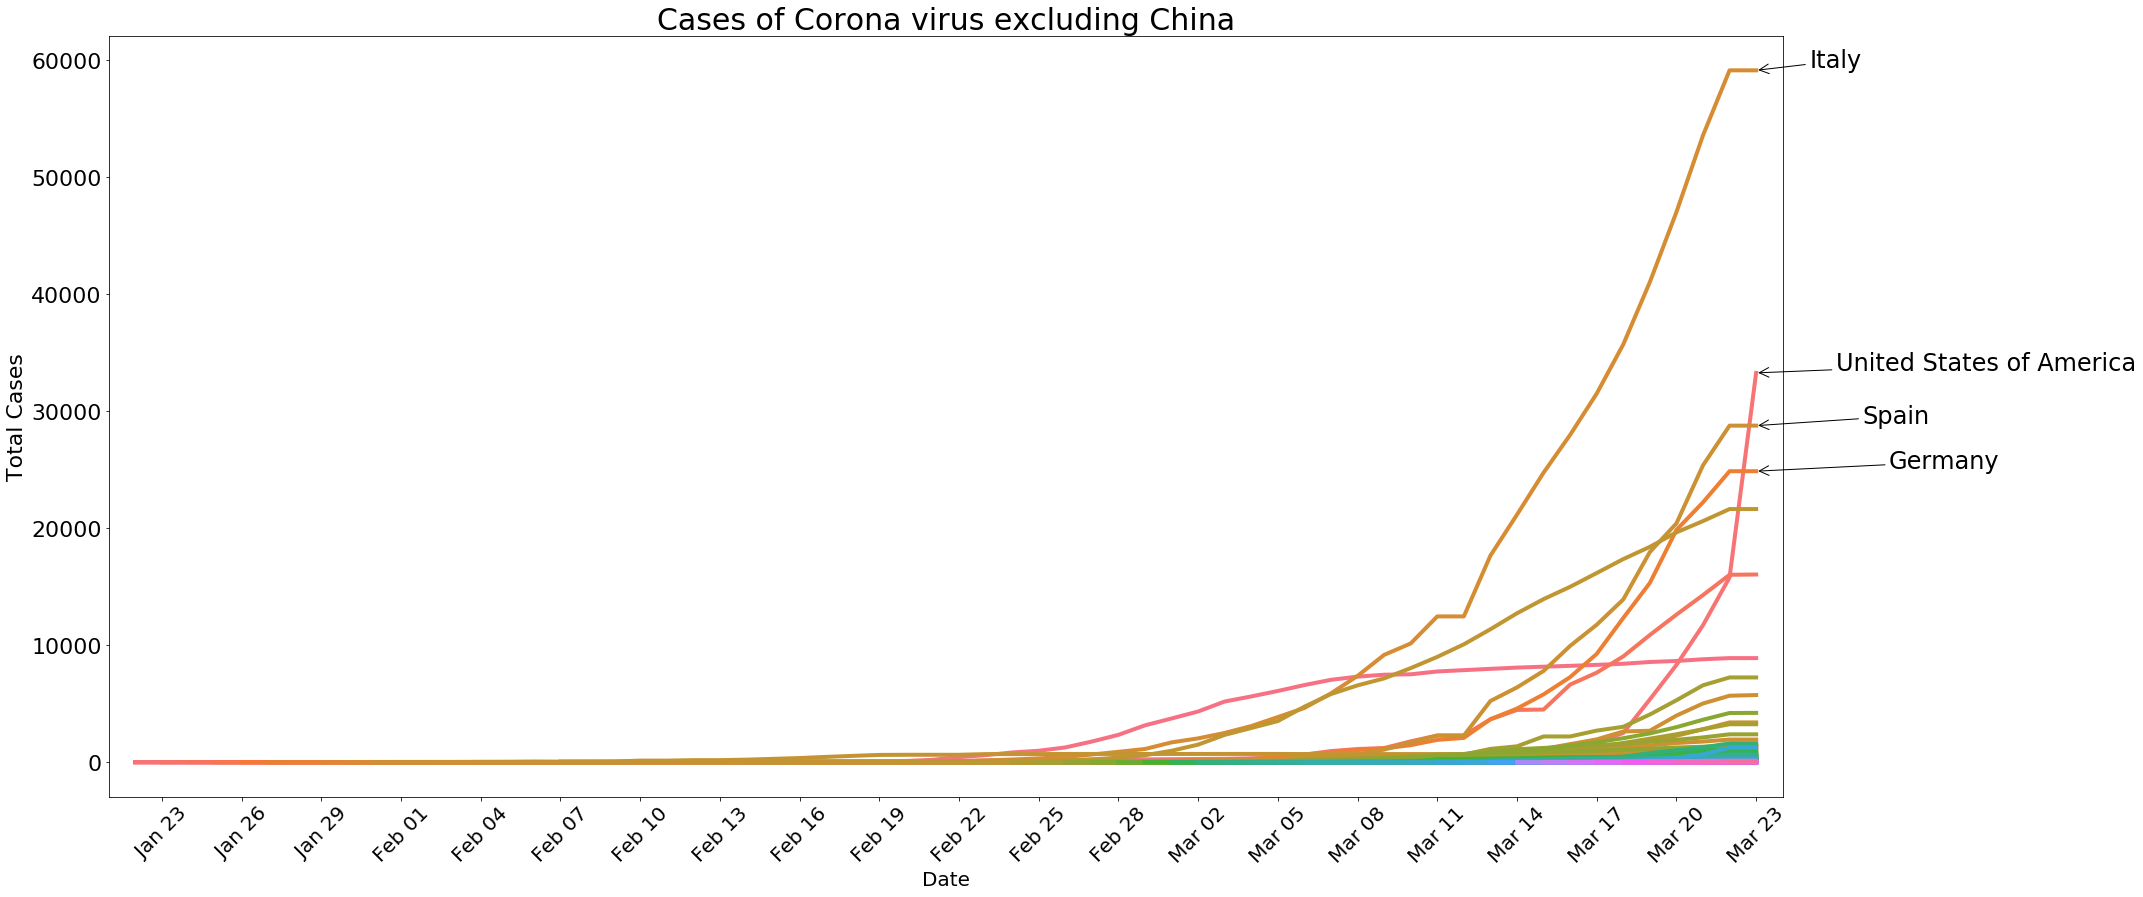

In [94]:
no_china_dataset = corona_cases[corona_cases['location'] != 'China']
no_china_dataset = no_china_dataset.sort_values(['date', 'location']).drop_duplicates(subset =['date', 'location'], keep = 'last') 
highest_countries = no_china_dataset.nlargest(6, ['date', 'total_cases']).reset_index()


plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset, linewidth=4 )

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=1)])

plt.title('Cases of Corona virus excluding China', fontsize =30)

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)


plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)

for i in range(4):
    ax.annotate(highest_countries.iloc[i].location, 
                xy=(no_china_dataset.date.max(), highest_countries.iloc[i].total_cases), fontsize=24,
                xytext=(no_china_dataset.date.max() + datetime.timedelta(days=(2 + i)),
                        highest_countries.iloc[i].total_cases + (200)), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

## Excluding outliers, (Italy, US, Germany, Spain)

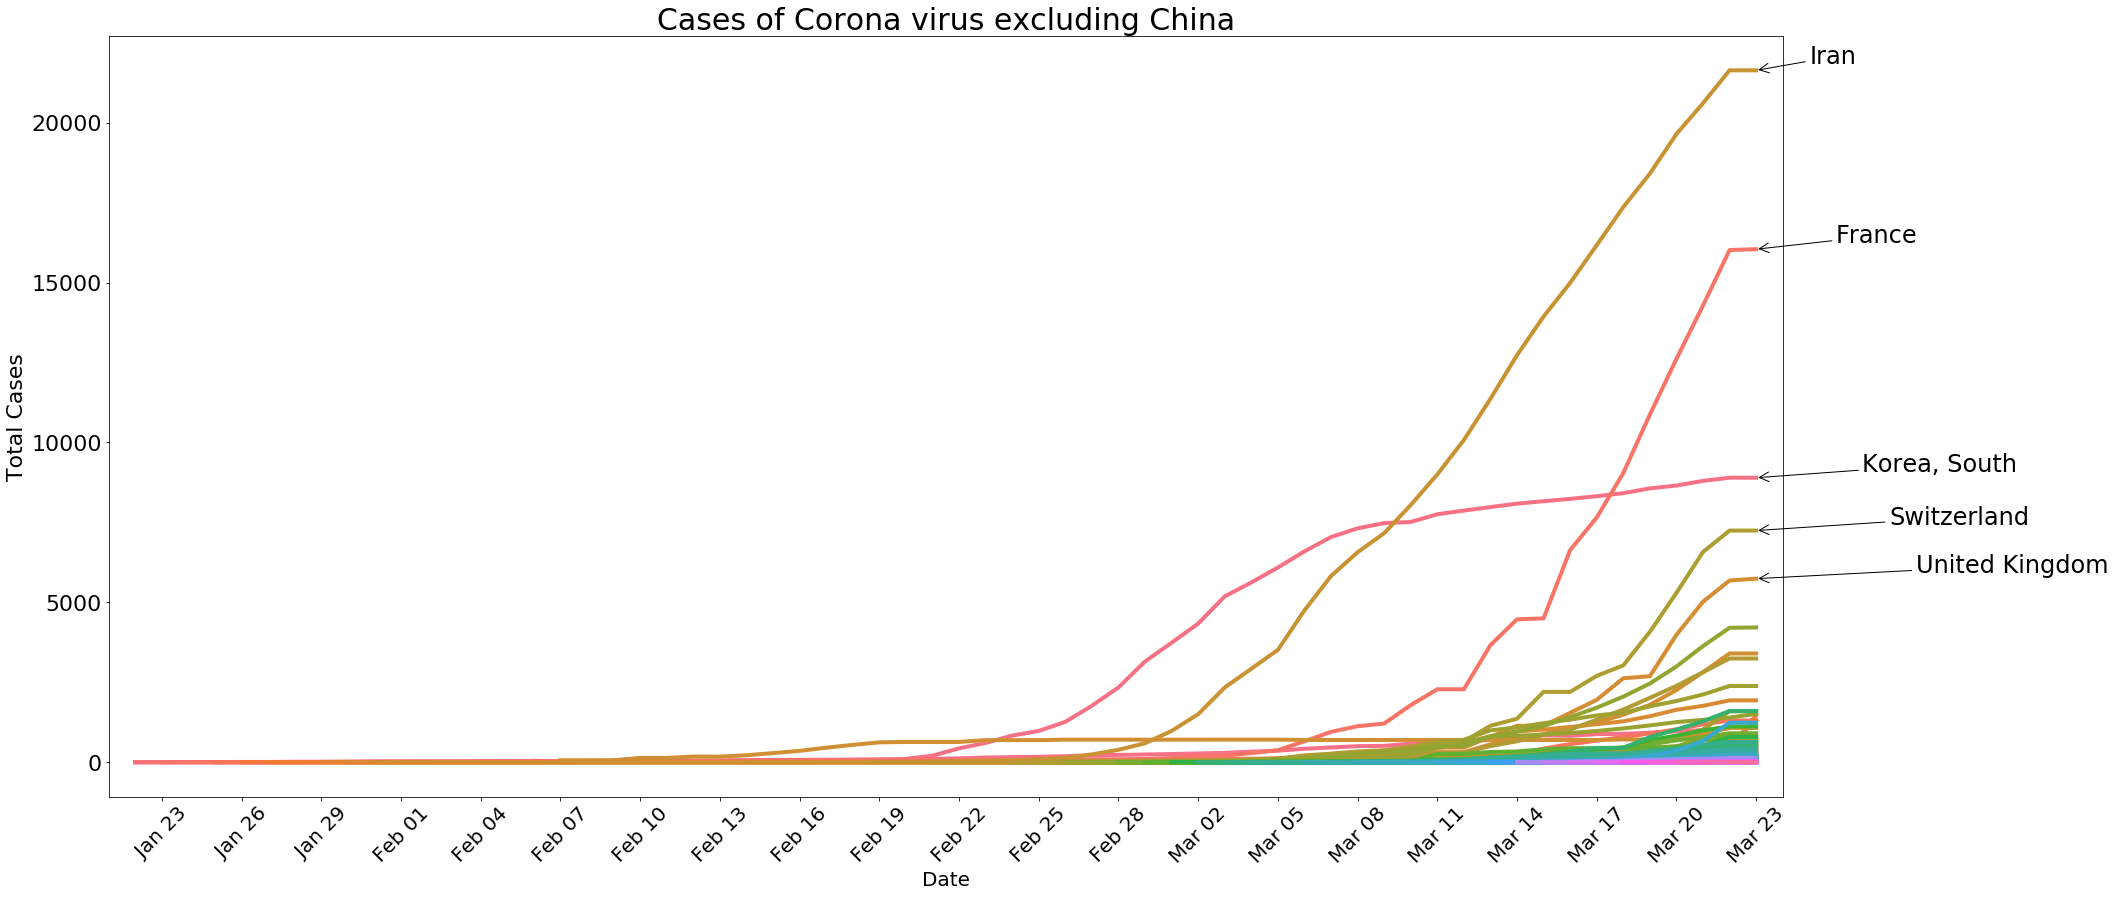

In [95]:
no_outliers = no_china_dataset[~ no_china_dataset['location'].isin(['Italy', 'United States of America', 'Spain', 'Germany']) ]


highest_no_outliers = no_outliers.nlargest(6, ['date', 'total_cases']).reset_index()

plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_outliers, linewidth=4)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_outliers.date.min() - datetime.timedelta(days=1), no_outliers.date.max() + datetime.timedelta(days=1)])
plt.title('Cases of Corona virus excluding China', fontsize = 30)

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)

for i in range(5):
    ax.annotate(highest_no_outliers.iloc[i].location, 
                xy=(no_outliers.date.max(), highest_no_outliers.iloc[i].total_cases), fontsize=24,
                xytext=(no_outliers.date.max() + datetime.timedelta(days=(2 + i)),
                        highest_no_outliers.iloc[i].total_cases + (200)), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

## Chinese Cities Corona Virus Spread

In [96]:
china_cities = corona_cases[corona_cases['location'] == 'China']
china_cities = china_cities[china_cities['province'] != 'China']
china_cities = china_cities[china_cities['province'] != 'Hubei']
china_cities_highest = china_cities.nlargest(4, ['date', 'total_cases']).reset_index()

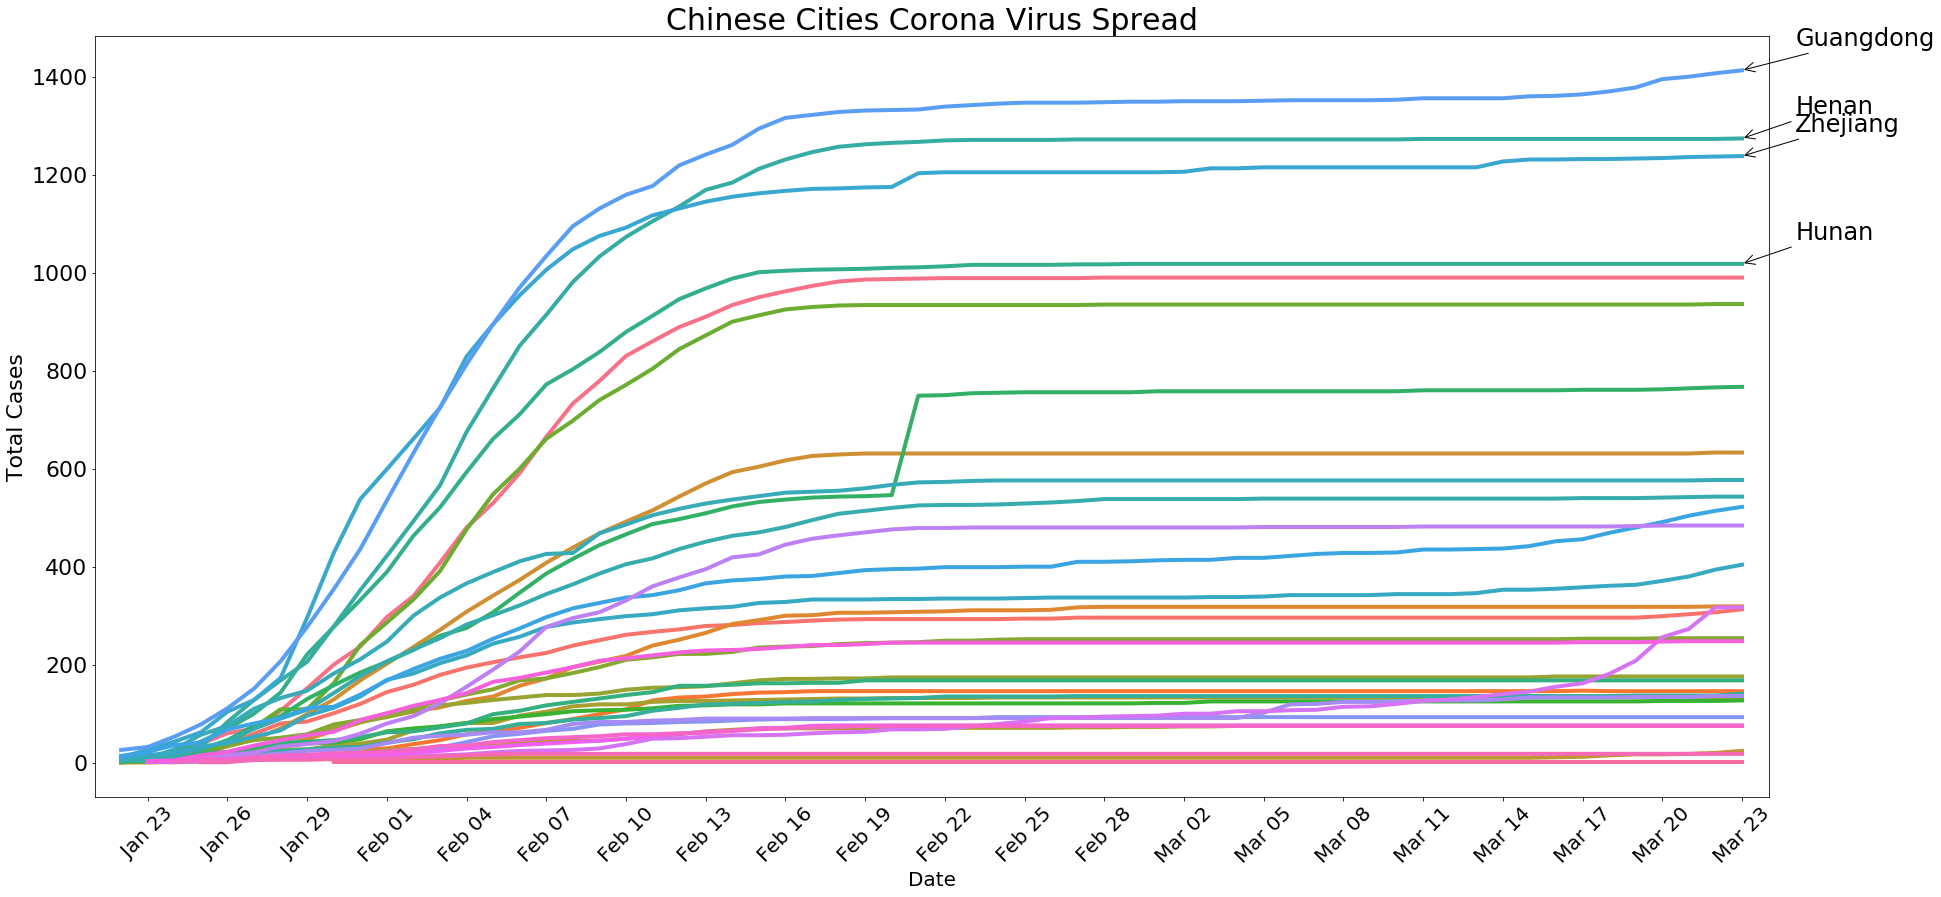

In [97]:
plt.figure(figsize = (30, 14))
plt.title('Chinese Cities Corona Virus Spread', fontsize=30)

ax = sns.lineplot(x="date", y="total_cases", hue="province", legend=False,  data=china_cities, linewidth=4)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([china_cities.date.min() - datetime.timedelta(days=1), china_cities.date.max() + datetime.timedelta(days=1)])

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)

for i in range(4):
    ax.annotate(china_cities_highest.iloc[i].province, 
                xy=(china_cities.date.max(), china_cities_highest.iloc[i].total_cases), fontsize=24,
                xytext=(china_cities.date.max() + datetime.timedelta(days=2),
                        china_cities_highest.iloc[i].total_cases + 50), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

## Italy, Iran, Spain, Germany V.S China Cities ( exluding Hubei )

In [98]:
world_vs_china = corona_cases[corona_cases['location'].isin(['Italy', 'Iran', 'Spain', 'Germany', 'China'])]
world_vs_china = world_vs_china[world_vs_china.province != 'China']
world_vs_china.location[world_vs_china['location'] == 'China'] = world_vs_china.province[world_vs_china['location'] == 'China']
world_vs_china = world_vs_china[world_vs_china.location != 'Hubei']
world_highest = world_vs_china.nlargest(4, ['date', 'total_cases']).reset_index()

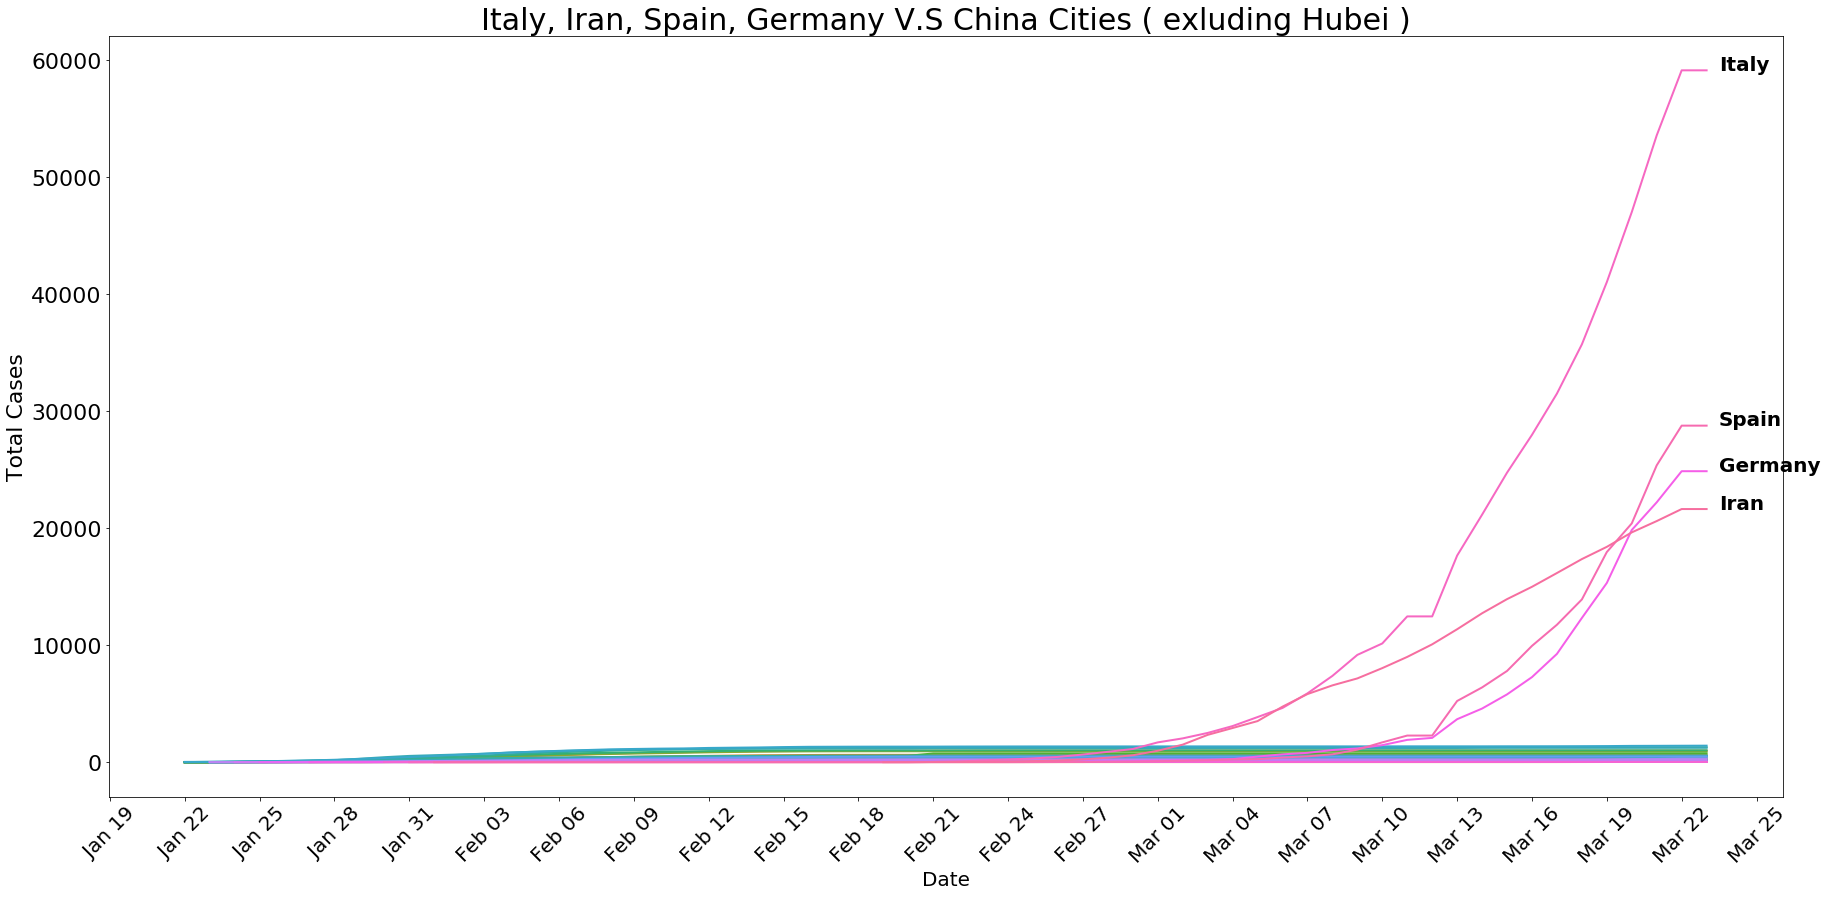

In [99]:
plt.figure(figsize = (30, 14))
plt.title('Italy, Iran, Spain, Germany V.S China Cities ( exluding Hubei )', fontsize=30)


ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,   data=world_vs_china, linewidth=2)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)

# ax.set_xlim([world_vs_china.date.min() - datetime.timedelta(days=1), world_vs_china.date.max() + datetime.timedelta(days=1)]);

    
# for i in range(4):
#     ax.annotate(world_highest.iloc[i].location, 
#                 xy=(world_vs_china.date.max(), world_highest.iloc[i].total_cases), fontsize=24,
#                 xytext=(world_vs_china.date.max() + datetime.timedelta(days=2),
#                         world_highest.iloc[i].total_cases + 50), 
#                 arrowprops=dict(facecolor='black', arrowstyle="->"));

for line in range(0,world_highest.shape[0]):
     ax.text(world_highest.date[line] + datetime.timedelta(days=0.5), world_highest.total_cases[line], world_highest.location[line], horizontalalignment='left', size='20', color='black', weight='bold')



## Gulf Countries

In [100]:
gulf_countries = corona_cases[corona_cases.location.isin(['Saudi Arabia', 'Kuwait', 'Bahrain', 'United Arab Emirates', 'Qatar', 'Oman'])]
gulf_highest = gulf_countries.nlargest(6, ['date', 'total_cases']).reset_index()
gulf_highest

,index,province,location,Lat,Long,date,total_cases
0,7809,0,Saudi Arabia,24.0000,45.0000,2020-03-23,511.0
1,7806,0,Qatar,25.3548,51.1839,2020-03-23,494.0
2,7791,0,Bahrain,26.0275,50.5500,2020-03-23,332.0
3,7759,0,Kuwait,29.5000,47.7500,2020-03-23,188.0
4,7748,0,United Arab Emirates,24.0000,54.0000,2020-03-23,153.0
5,7695,0,Oman,21.0000,57.0000,2020-03-23,55.0


### Saudi Arabia

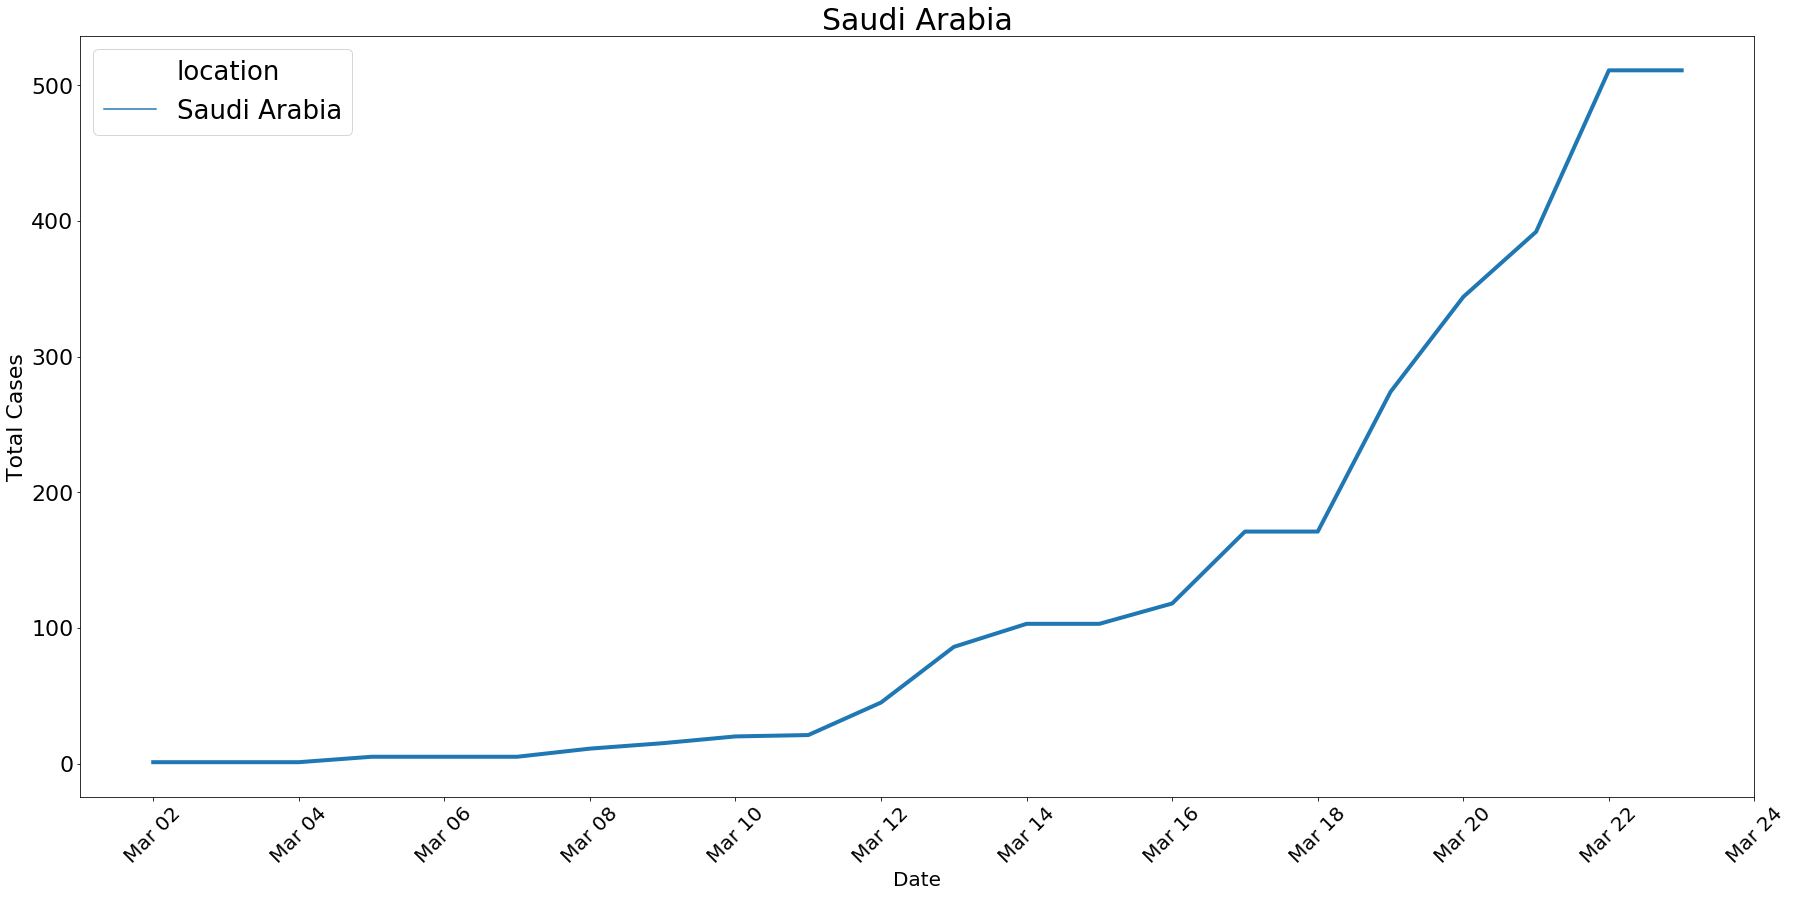

In [101]:
saudi = gulf_countries[gulf_countries.location == 'Saudi Arabia']


plt.figure(figsize = (30, 14))
plt.title('Saudi Arabia', fontsize=30)

ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=saudi, linewidth=4)

ax.set_xlim([saudi.date.min() - datetime.timedelta(days=1), saudi.date.max() + datetime.timedelta(days=1)])

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=26)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

### Gulf Countries

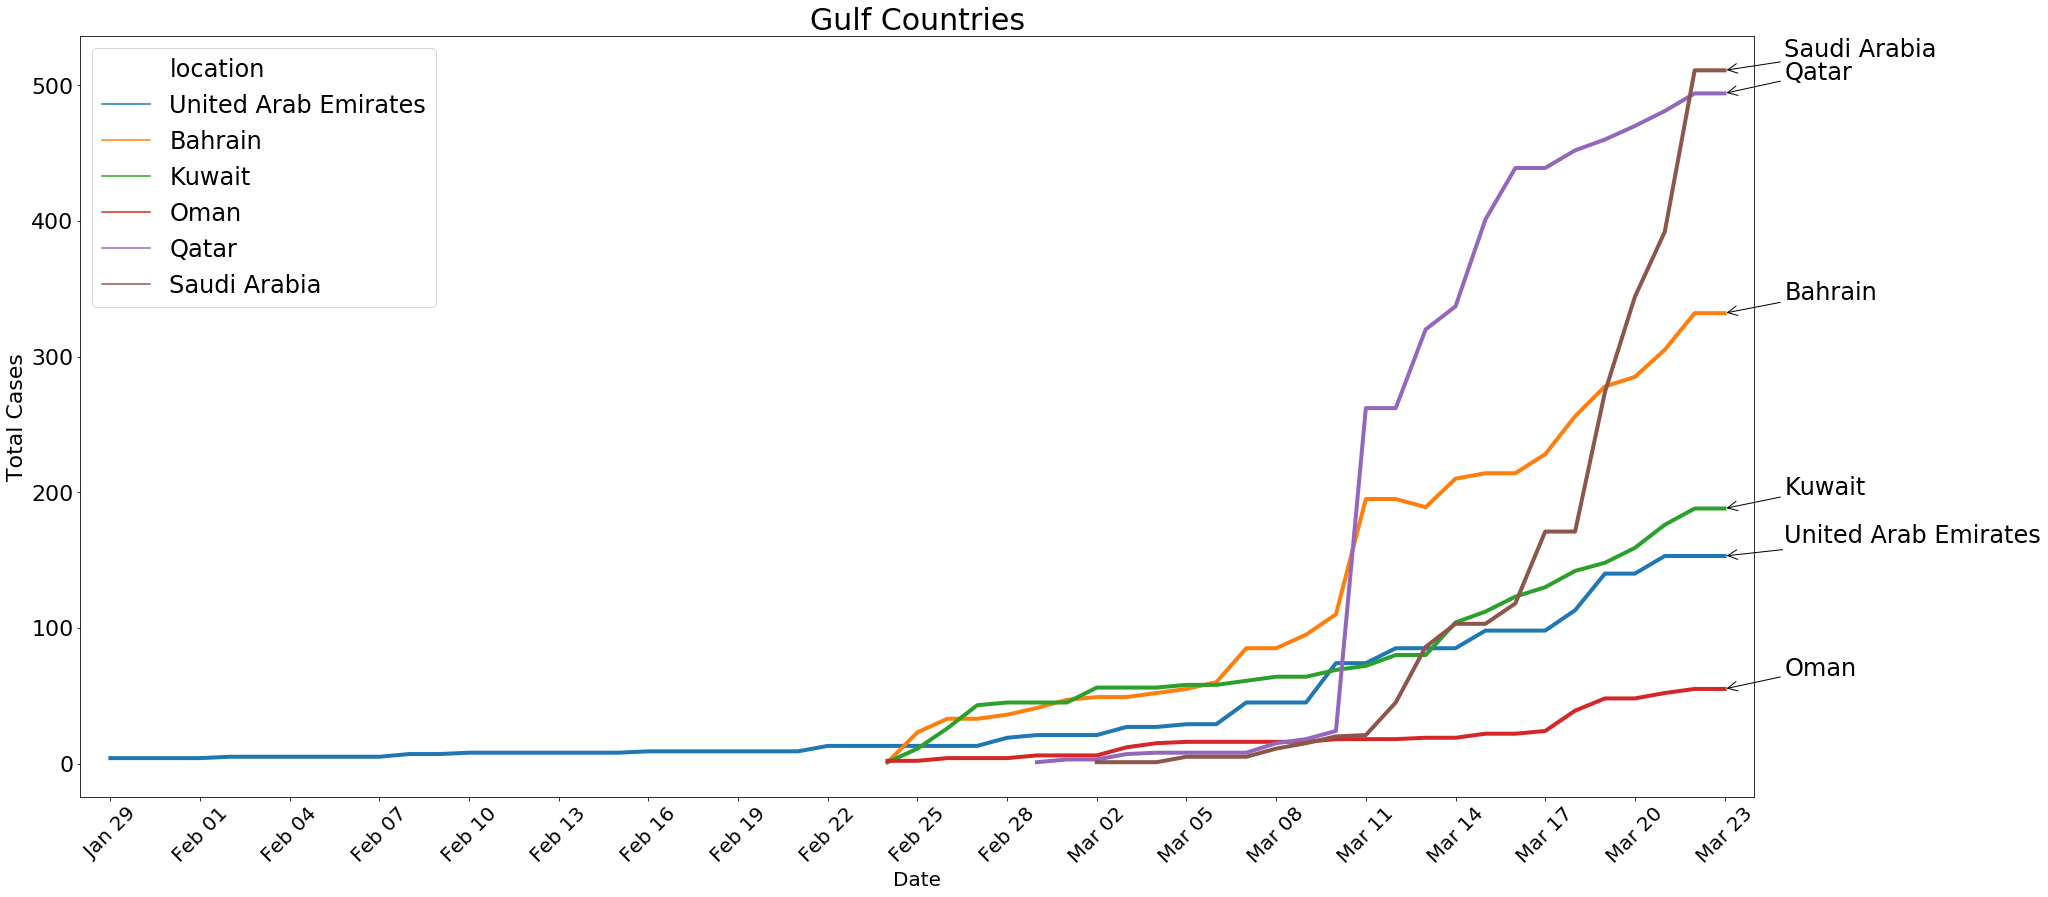

In [102]:
plt.figure(figsize = (30, 14))
plt.title('Gulf Countries', fontsize=30)


ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=gulf_countries, linewidth=4)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([gulf_countries.date.min() - datetime.timedelta(days=1), gulf_countries.date.max() + datetime.timedelta(days=1)])

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=24)

for i in range(gulf_highest.shape[0]):
    ax.annotate(gulf_highest.iloc[i].location, 
                xy=(gulf_countries.date.max(), gulf_highest.iloc[i].total_cases), fontsize=24,
                xytext=(gulf_countries.date.max() + datetime.timedelta(days=2),
                        gulf_highest.iloc[i].total_cases + 10), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

## Weekly Period

In [103]:
# will assign the number of week sense the first case 
def num_of_week(date, location):
    start_date = corona_cases.date[(corona_cases.location == location)].min()    
    week_num = (date - start_date)
    return int(week_num / np.timedelta64(1, 'W')) + 1


### Gulf Countries

In [104]:
gulf_countries['week'] = gulf_countries.apply(lambda x: num_of_week(x['date'], x['location']), axis=1)
gulf_countries = gulf_countries.sort_values(['date', 'total_cases'])

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
weekly = gulf_countries.sort_values("date").drop_duplicates(subset =['location', 'week'], keep = 'last') 

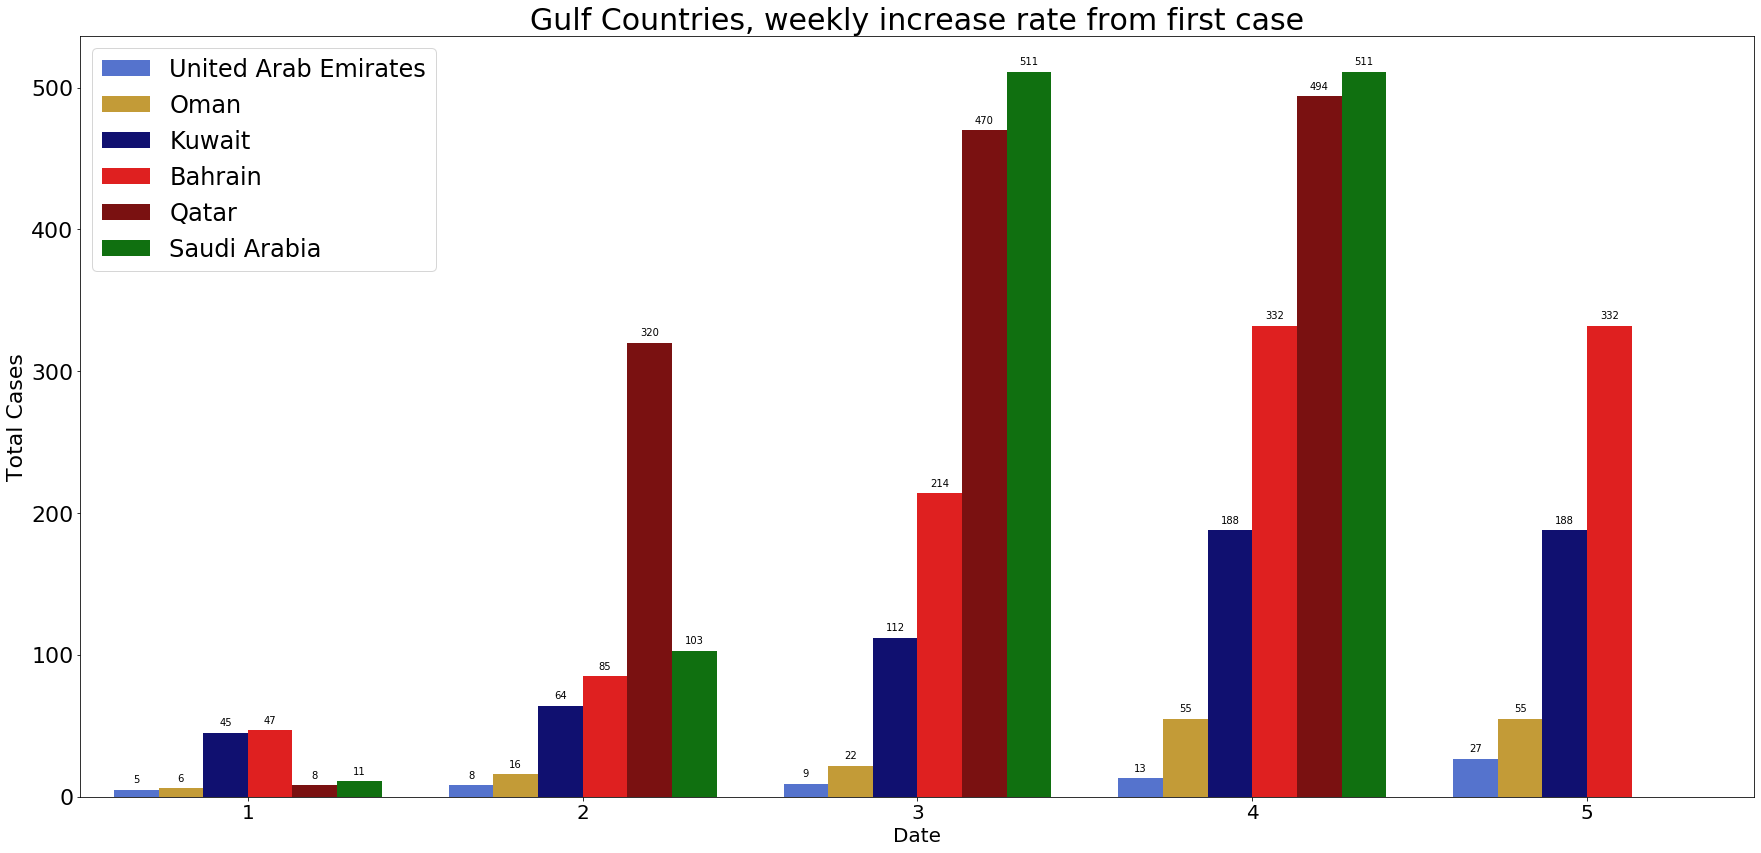

In [106]:
plt.figure(figsize = (30, 14))
plt.title('Gulf Countries, weekly increase rate from first case', fontsize=30)

palette = {
    'United Arab Emirates': 'royalblue',
    'Kuwait': 'navy',
    'Bahrain': 'r',
    'Saudi Arabia': 'green',
    'Oman': 'goldenrod',
    'Qatar': 'darkred'
}
ax = sns.barplot(x="week", y="total_cases", hue="location", ci=None,  data=weekly[weekly['week'] < 6], palette=palette)

plt.xticks(fontsize =20)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=24)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [121]:
weekly_new = gulf_countries.groupby(['location', 'week']).agg({'new_cases':sum}).reset_index() # new_cases was created a few blocks down

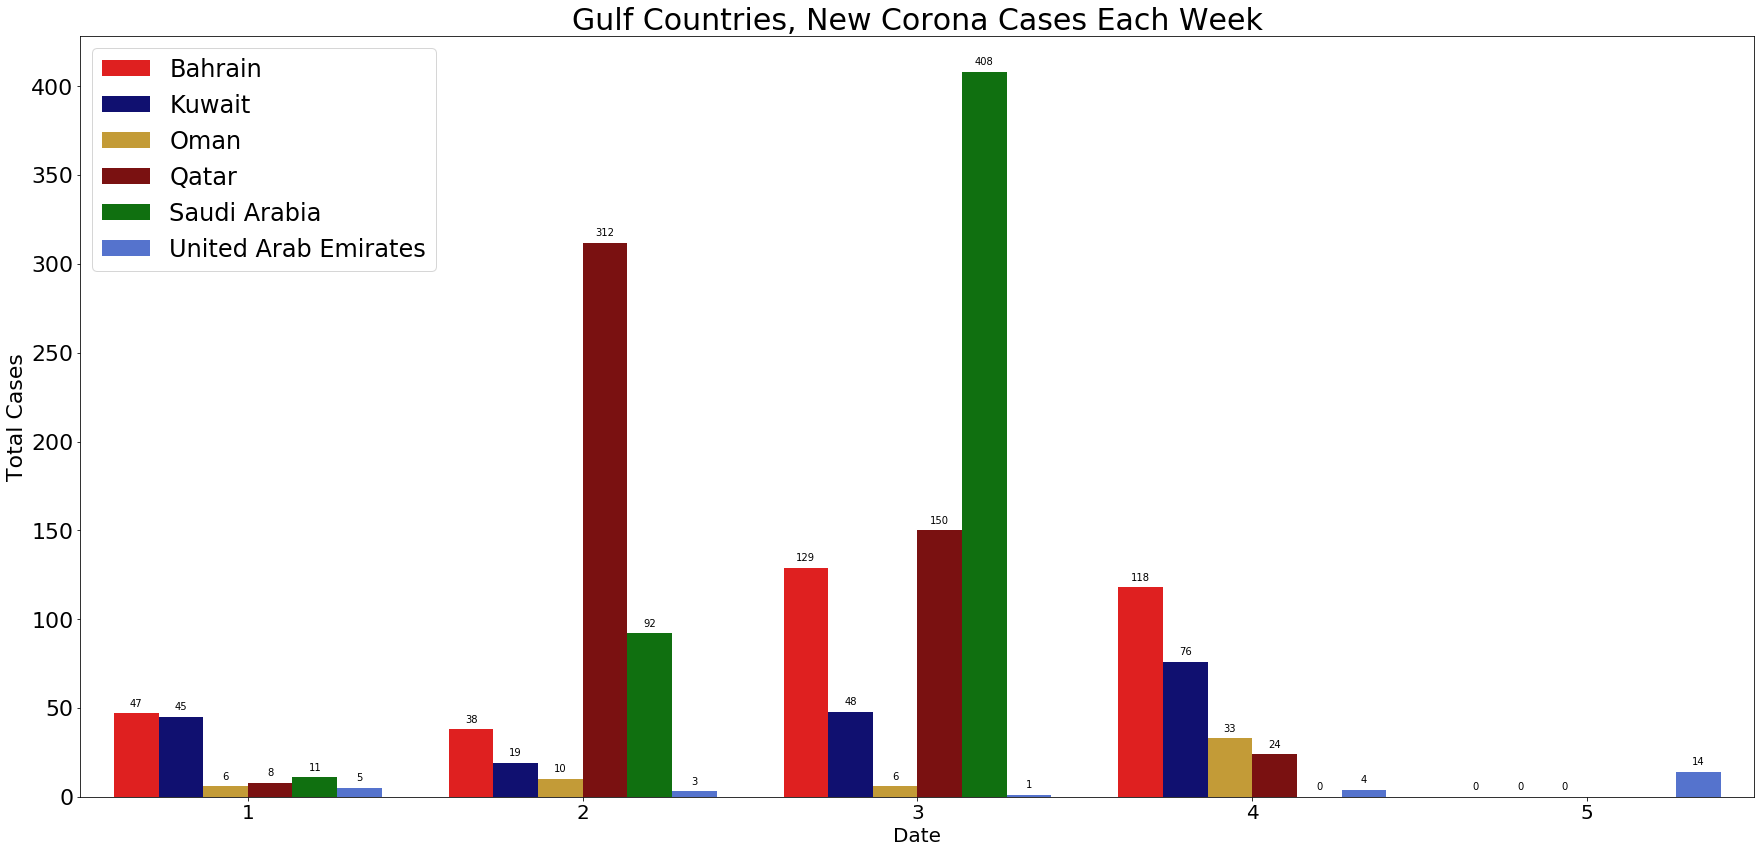

In [120]:
plt.figure(figsize = (30, 14))
plt.title('Gulf Countries, New Corona Cases Each Week', fontsize=30)

palette = {
    'United Arab Emirates': 'royalblue',
    'Kuwait': 'navy',
    'Bahrain': 'r',
    'Saudi Arabia': 'green',
    'Oman': 'goldenrod',
    'Qatar': 'darkred'
}
ax = sns.barplot(x="week", y="new_cases", hue="location", ci=None,  data=weekly_new[weekly_new['week'] < 6], palette=palette)

plt.xticks(fontsize =20)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=24)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Other Countries V.S. Saudi Arabia

In [125]:
iiss = corona_cases[corona_cases.location.isin(['Italy', 'Iran', 'Spain', 'Saudi Arabia'])]

iiss['week'] = iiss.apply(lambda x: num_of_week(x['date'], x['location']), axis=1)
iiss = iiss.sort_values(['date', 'total_cases'])

weekly_iiss = iiss.sort_values("date").drop_duplicates(subset =['location', 'week'], keep = 'last')

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


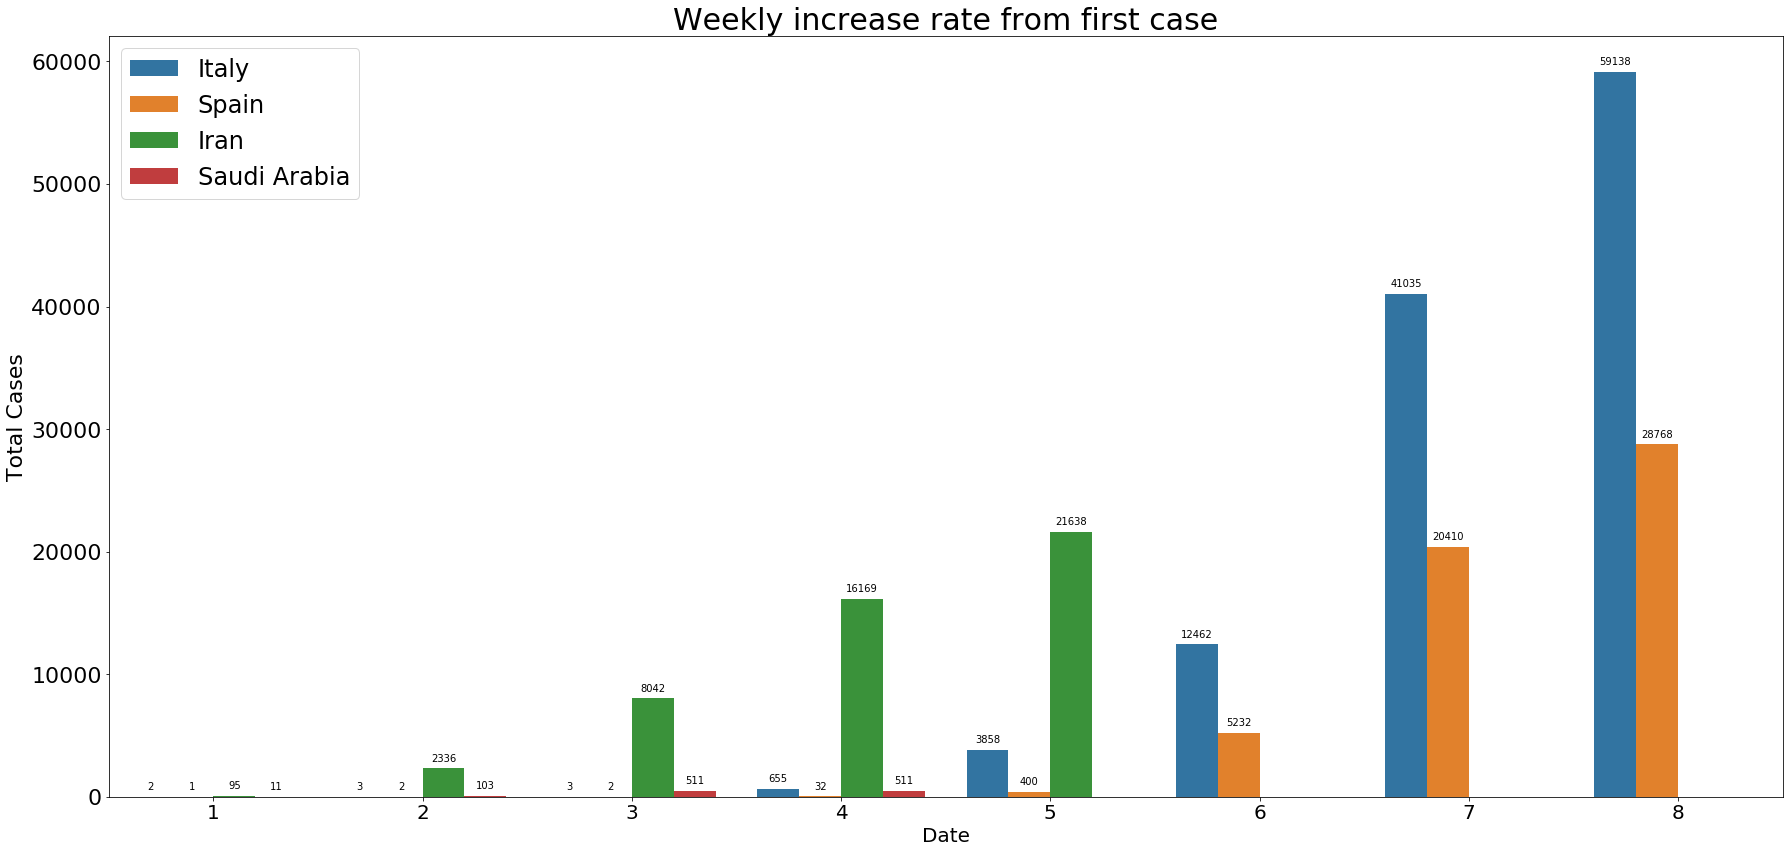

In [126]:
plt.figure(figsize = (30, 14))
plt.title('Weekly increase rate from first case', fontsize=30)

ax = sns.barplot(x="week", y="total_cases", hue="location", ci=None,  data=weekly_iiss)

plt.xticks(fontsize =20)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=24)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [137]:
iiss['new_cases'] = iiss.apply(lambda x: new_cases(x['date'], x['location'], x['total_cases']), axis=1)
weekly_iss_new = iiss.groupby(['location', 'week']).agg({'new_cases':sum}).reset_index() # new_cases was created a few blocks down

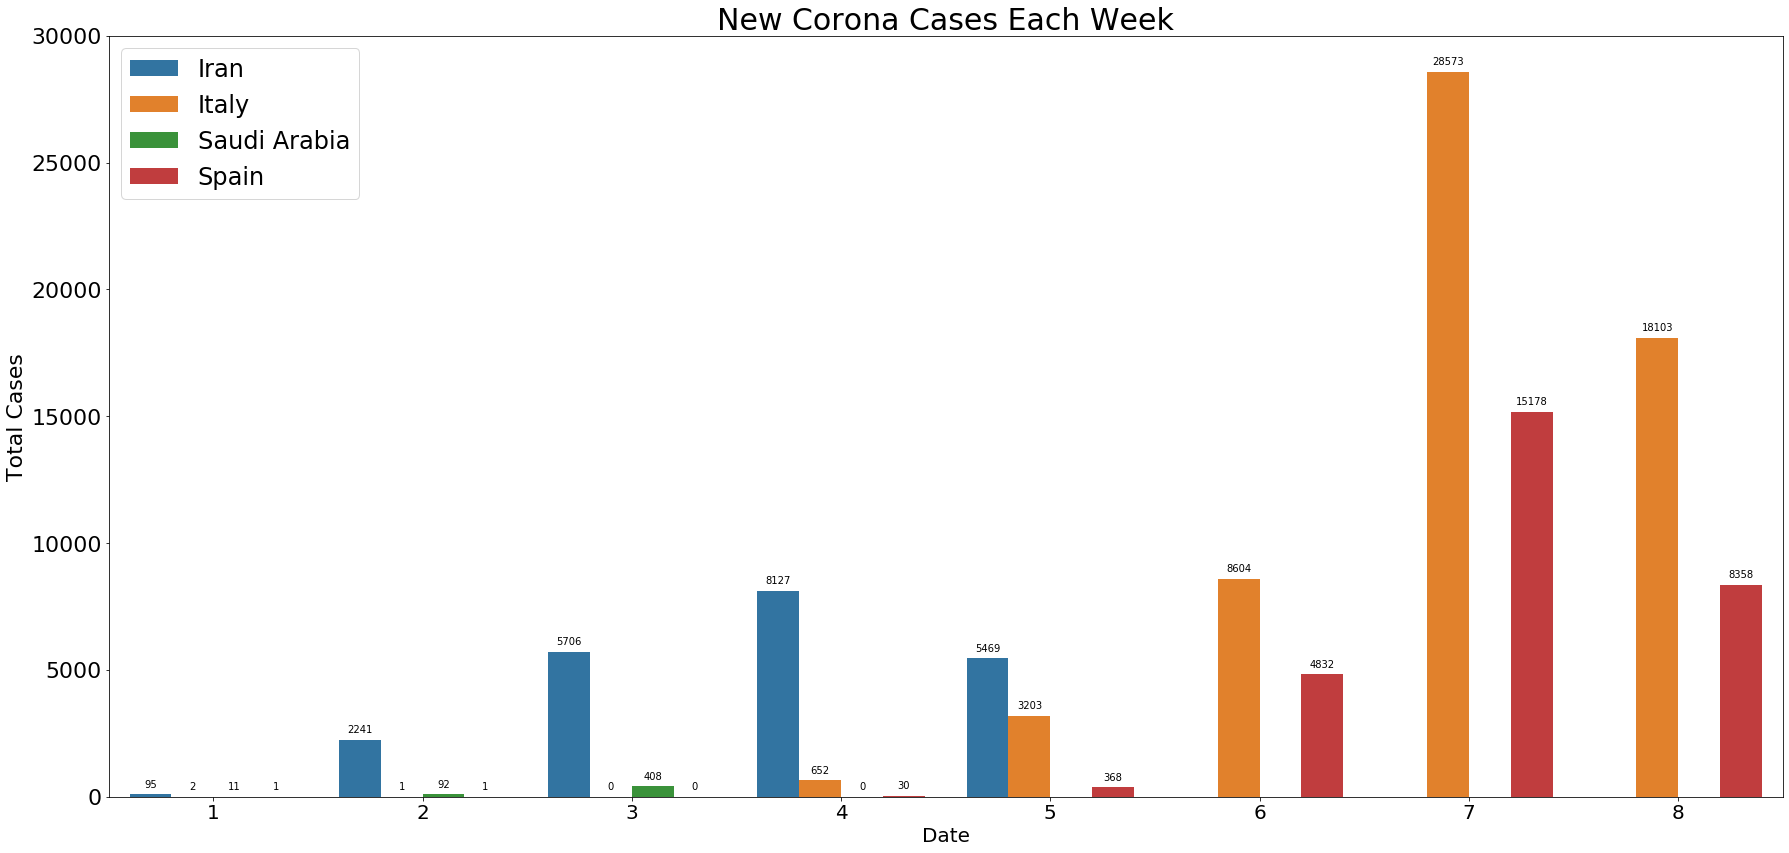

In [139]:
plt.figure(figsize = (30, 14))
plt.title('New Corona Cases Each Week', fontsize=30)

ax = sns.barplot(x="week", y="new_cases", hue="location", ci=None,  data=weekly_iss_new)

plt.xticks(fontsize =20)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=24)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Daily Growth rate

In [112]:
# get the new cases for each day
def new_cases(date, location, cases):
    # if the date given is not the start day for corona cases at the given location then proceed 
    if corona_cases.date[(corona_cases.location == location)].min() < date:
        prev_day = date - datetime.timedelta(days=1)
        prev_day_cases = corona_cases.total_cases[(corona_cases.location == location) & (corona_cases.date == prev_day)]        
        return int(cases - prev_day_cases)
    else: 
        return cases

### Gulf Countries

In [113]:
gulf_countries['new_cases'] = gulf_countries.apply(lambda x: new_cases(x['date'], x['location'], x['total_cases']), axis=1)

#### Saudi daily growth

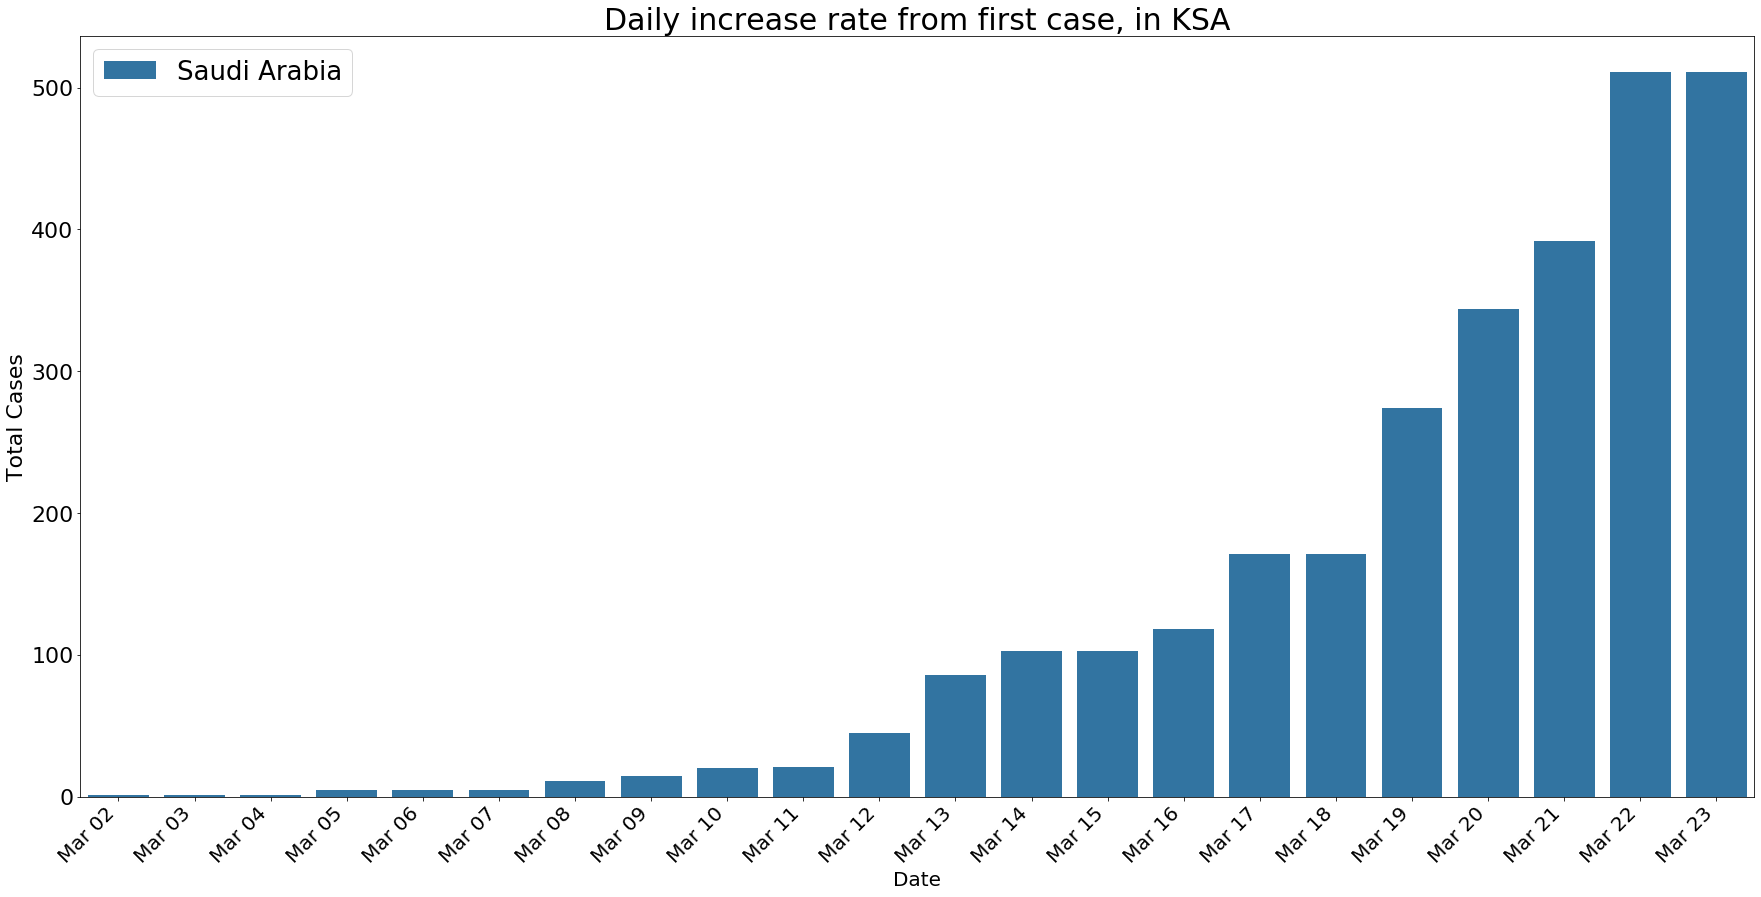

In [27]:
saudi = gulf_countries[gulf_countries.location == 'Saudi Arabia']


plt.figure(figsize = (30, 14))
plt.title('Daily increase rate from first case, in KSA', fontsize=30)

ax = sns.barplot(x="date", y="total_cases", hue="location",  data=saudi, linewidth=4)

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=26)


x_dates = saudi['date'].dt.strftime('%b %d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');


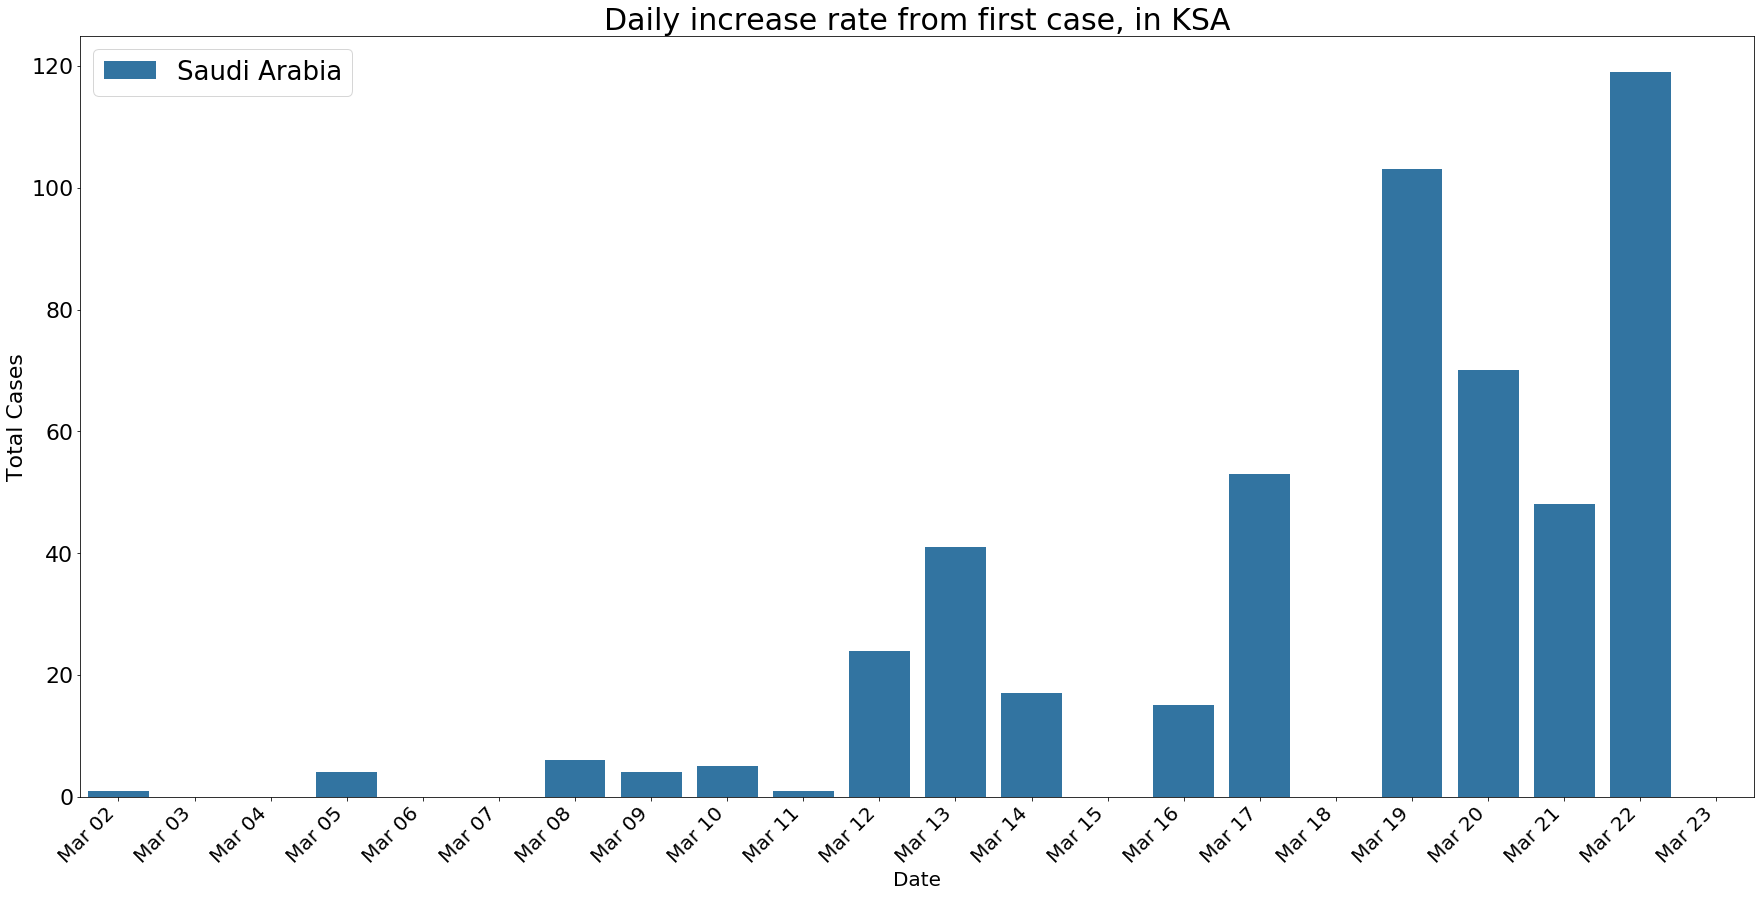

In [28]:
saudi = gulf_countries[gulf_countries.location == 'Saudi Arabia']


plt.figure(figsize = (30, 14))
plt.title('Daily increase rate from first case, in KSA', fontsize=30)

ax = sns.barplot(x="date", y="new_cases", hue="location",  data=saudi, linewidth=4)

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=26)


x_dates = saudi['date'].dt.strftime('%b %d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');

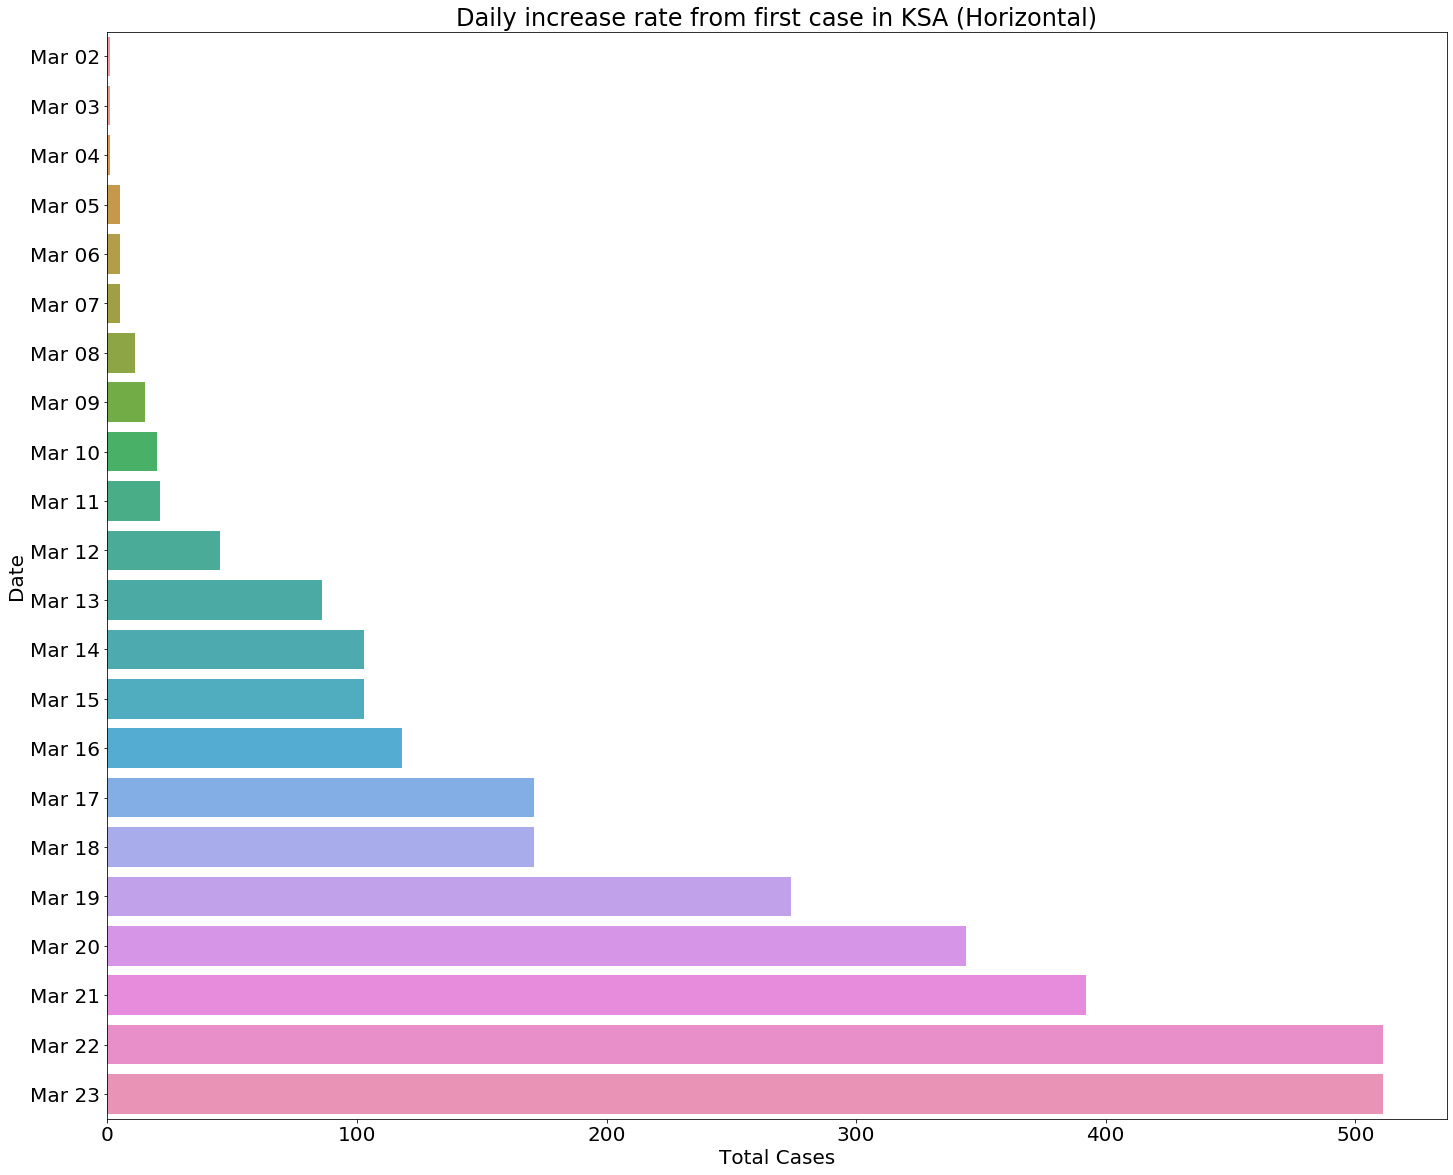

In [29]:
saudi = gulf_countries[gulf_countries.location == 'Saudi Arabia']
plt.figure(figsize = (24, 20))

plt.title('Daily increase rate from first case in KSA (Horizontal)', fontsize =24)

ax = sns.barplot(x="total_cases", y="date",  data=saudi, orient = 'h');

plt.yticks(fontsize =20)
plt.xticks(fontsize =20)
plt.ylabel('Date', fontsize =20)
plt.xlabel('Total Cases', fontsize =20)

y_dates = saudi['date'].dt.strftime('%b %d').sort_values().unique()
ax.set_yticklabels(labels=y_dates, ha='right');


/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
No handles with labels found to put in legend.


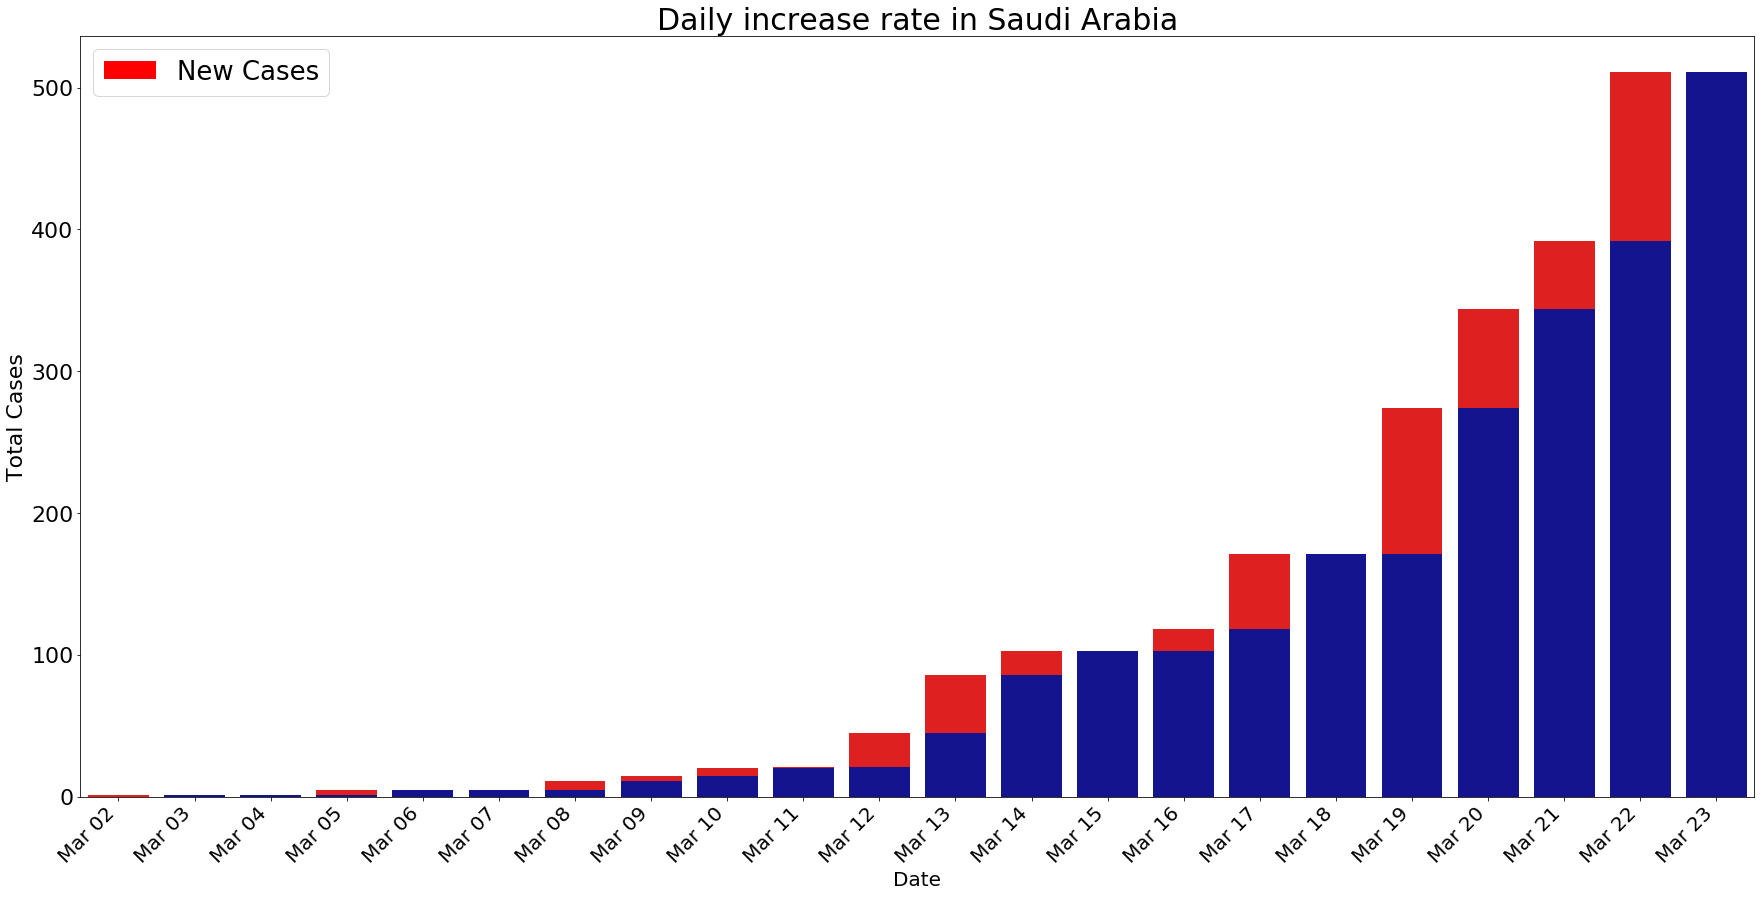

In [30]:
saudi = gulf_countries[gulf_countries.location == 'Saudi Arabia']
saudi['new_cases'] = saudi['total_cases'] - saudi['new_cases']

plt.figure(figsize = (30, 14))
plt.title('Daily increase rate in Saudi Arabia', fontsize=30)


sns.barplot(x='date', y='total_cases', data=saudi, color='red')
bottom_plot = sns.barplot(x='date', y='new_cases', data=saudi, color='#0000A3')


plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)
plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=26)

x_dates = saudi['date'].dt.strftime('%b %d').sort_values().unique()
bottom_plot.set_xticklabels(labels=x_dates, rotation=45, ha='right')

top_bar = plt.Rectangle((0, 0), 1, 1, fc='red')
plt.legend([top_bar], ['New Cases'], loc='upper left', ncol=1, prop={'size':26});

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
No handles with labels found to put in legend.


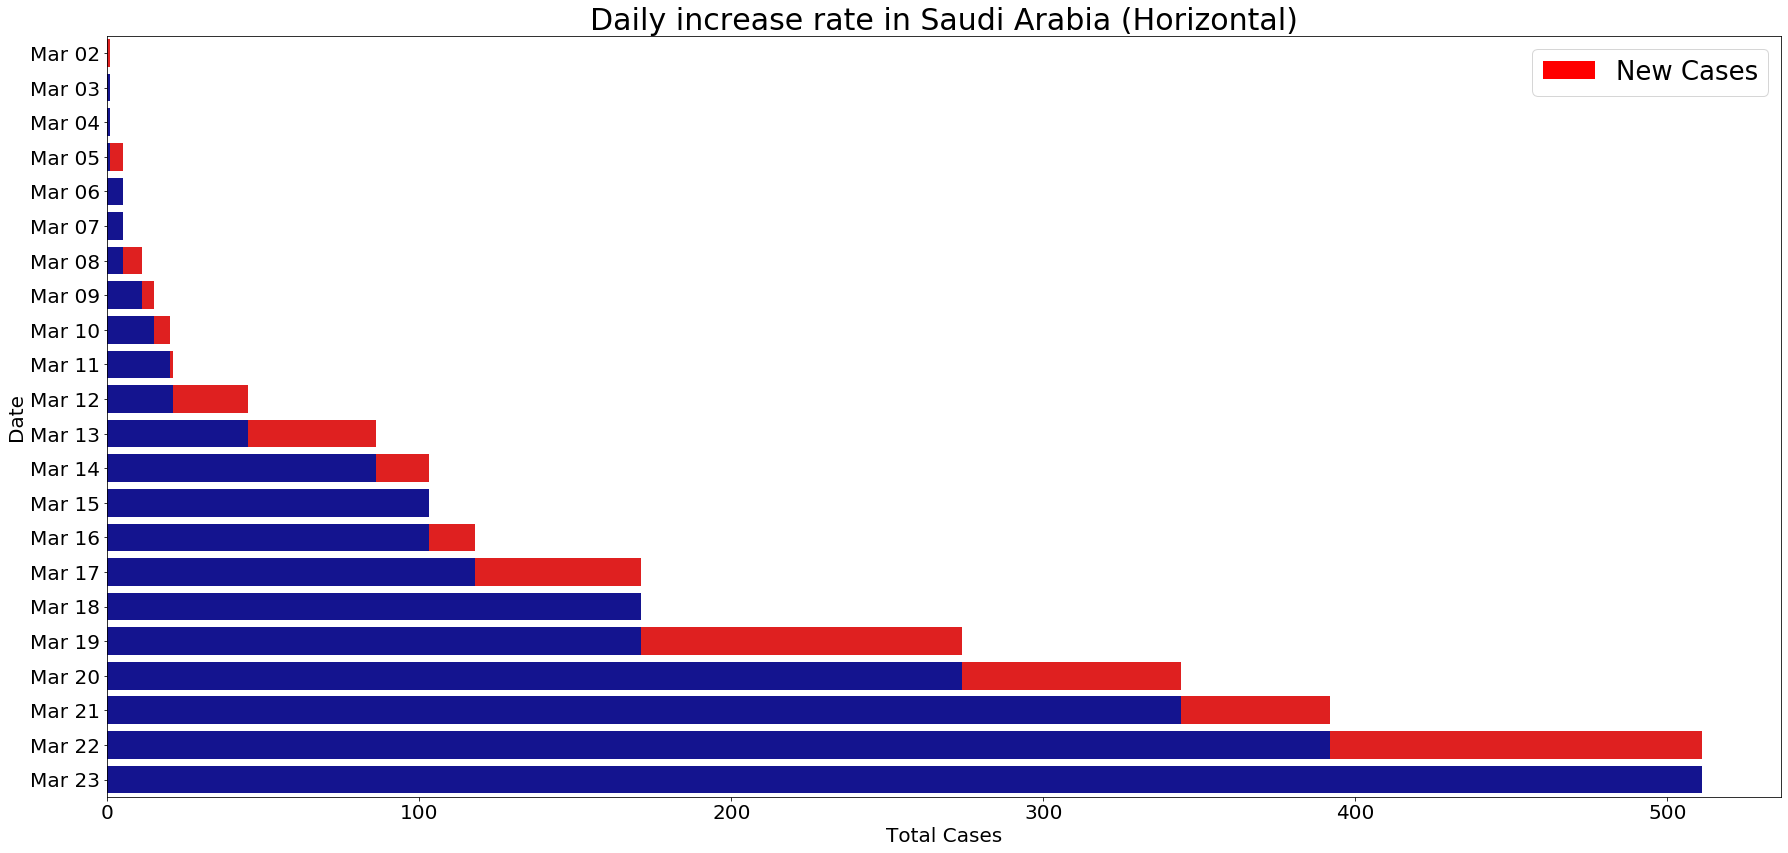

In [31]:
saudi = gulf_countries[gulf_countries.location == 'Saudi Arabia']
saudi['new_cases'] = saudi['total_cases'] - saudi['new_cases']

plt.figure(figsize = (30, 14))
plt.title('Daily increase rate in Saudi Arabia (Horizontal)', fontsize=30)

sns.barplot(y='date', x='total_cases', data=saudi, color='red', orient = 'h')
bottom_plot = sns.barplot(y='date', x='new_cases', data=saudi, color='#0000A3', orient = 'h')

plt.yticks(fontsize =20)
plt.xticks(fontsize =20)
plt.ylabel('Date', fontsize =20)
plt.xlabel('Total Cases', fontsize =20)
plt.legend(fontsize=26)

y_dates = saudi['date'].dt.strftime('%b %d').sort_values().unique()
bottom_plot.set_yticklabels(labels=y_dates, ha='right');

top_bar = plt.Rectangle((0, 0), 1, 1, fc='red')
plt.legend([top_bar], ['New Cases'], loc='upper right', ncol=1, prop={'size':26});

No handles with labels found to put in legend.


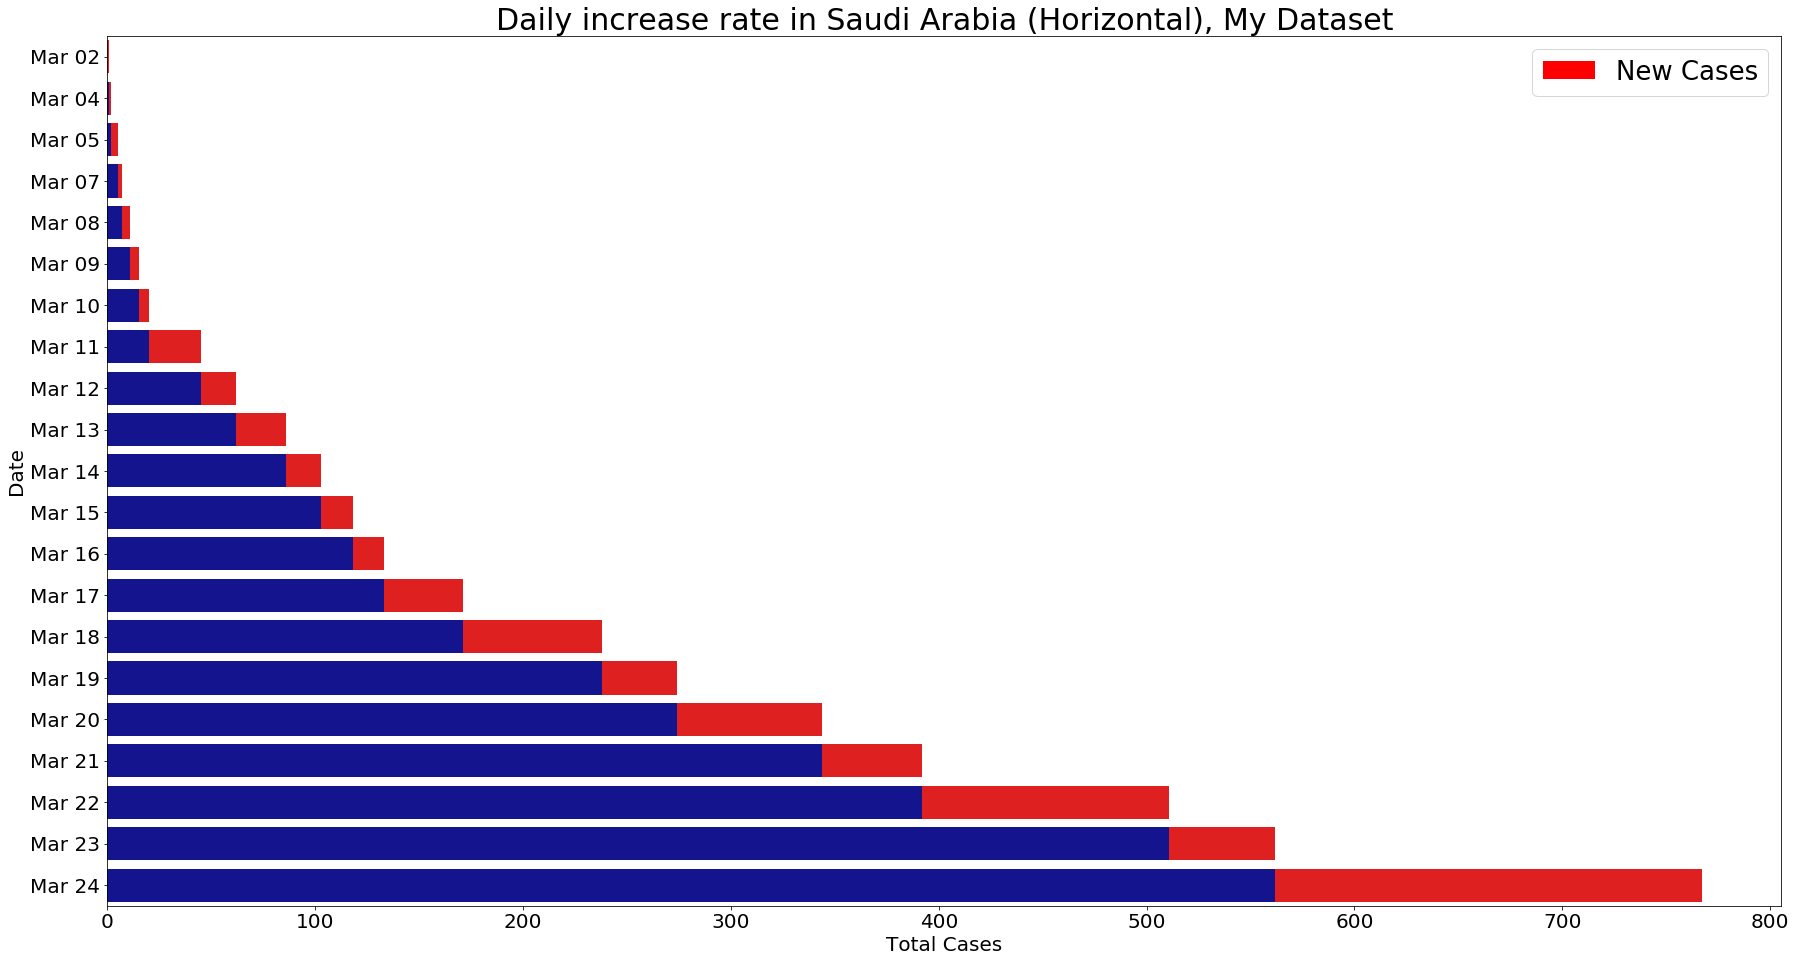

In [32]:
saudi_cases = pd.read_excel('../data/corona_cases_ksa.xlsx')

saudi = saudi_cases.groupby(['date']).agg({'new_cases': sum, 'total_cases': max}).reset_index()
saudi['new_cases'] = saudi['total_cases'] - saudi['new_cases']

plt.figure(figsize = (30, 16))
plt.title('Daily increase rate in Saudi Arabia (Horizontal), My Dataset', fontsize=30)
sns.barplot(y='date', x='total_cases', data=saudi, color='red', orient = 'h')

bottom_plot = sns.barplot(y='date', x='new_cases', data=saudi, color='#0000A3', orient = 'h')

plt.yticks(fontsize =20)
plt.xticks(fontsize =20)
plt.ylabel('Date', fontsize =20)
plt.xlabel('Total Cases', fontsize =20)
plt.legend(fontsize=26)

y_dates = saudi['date'].dt.strftime('%b %d').sort_values().unique()
bottom_plot.set_yticklabels(labels=y_dates, ha='right');

top_bar = plt.Rectangle((0, 0), 1, 1, fc='red')
plt.legend([top_bar], ['New Cases'], loc='upper right', ncol=1, prop={'size':26});

## Death Weekly growth

In [33]:
iifs_d = death_dataset[death_dataset.location.isin(['Italy', 'Iran', 'Spain'])]

iifs_d['week'] = iifs_d.apply(lambda x: num_of_week(x['date'], x['location']), axis=1)
iifs_d = iifs_d.sort_values(['date', 'total_deaths'])
iifs_highest_d = iifs_d.nlargest(4, ['date', 'total_deaths']).reset_index()

weekly_iifs_d = iifs_d[iifs_d.total_deaths > 0].sort_values("date").drop_duplicates(subset =['location', 'week'], keep = 'last') 

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


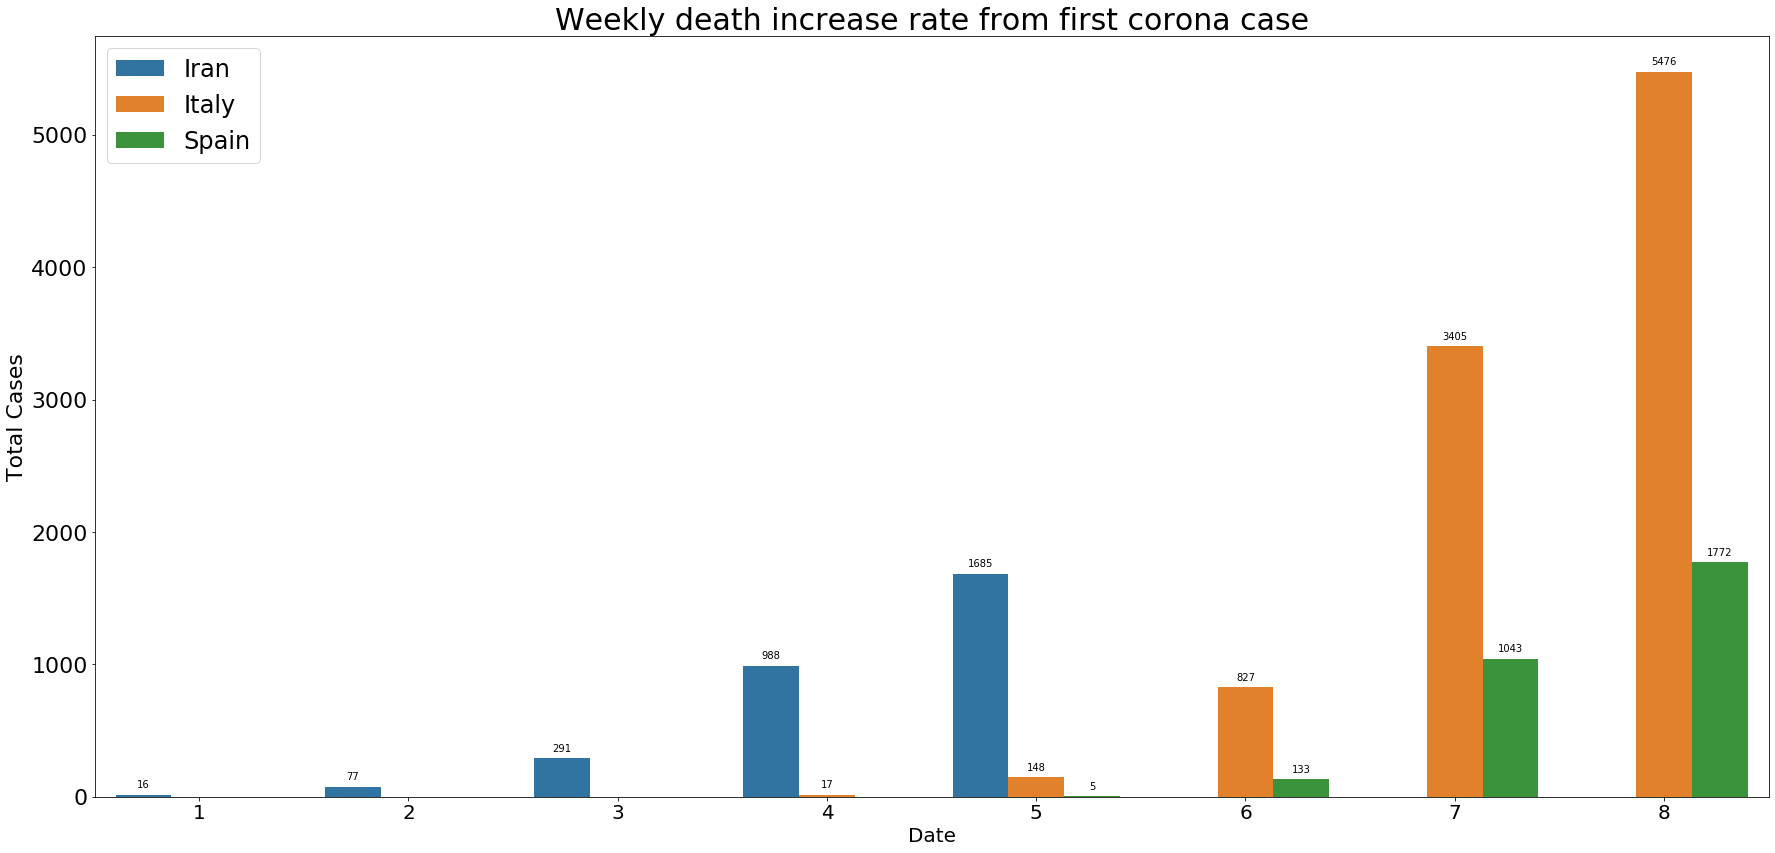

In [79]:
plt.figure(figsize = (30, 14))
plt.title('Weekly death increase rate from first corona case', fontsize=30)

ax = sns.barplot(x="week", y="total_deaths", hue="location", ci=None,  data=weekly_iifs_d)

plt.xticks(fontsize =20)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=24, loc='upper left')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Rate of MOH Hospital Beds by Health Regions during 1439H


In [35]:
MOH_hospital_beds = pd.read_excel('../data/rate_of_moh_hospital_beds.xlsx')
MOH_hospital_beds

,المنطقة,Name,Regions,total_population,hospital_beds,population_rate
0,الرياض,Ar Riyad,Riyadh,8446866,8337,9.869933
1,العاصمة المقدسة,Makkah,Makkah,8803545,8825,10.024371
2,المدينة المنوره,Al Madinah,Medinah,2188138,2768,12.650025
3,القصيم,Al Quassim,Qaseem,1455693,2859,19.640130
4,الشرقيه,Ash Sharqiyah,Eastern province,5028753,6311,12.549831
5,عسير,`Asir,Asir,2261618,3100,13.707001
6,تبوك,Tabuk,Tabouk,930507,1820,19.559230
7,حائل,Ha'il,Ha`il,716021,1790,24.999267
8,الحدود الشماليه,Al Hudud ash Shamaliyah,Northern Frontier,375310,1360,36.236711
9,جازان,Jizan,Jizan,1603659,2225,13.874521


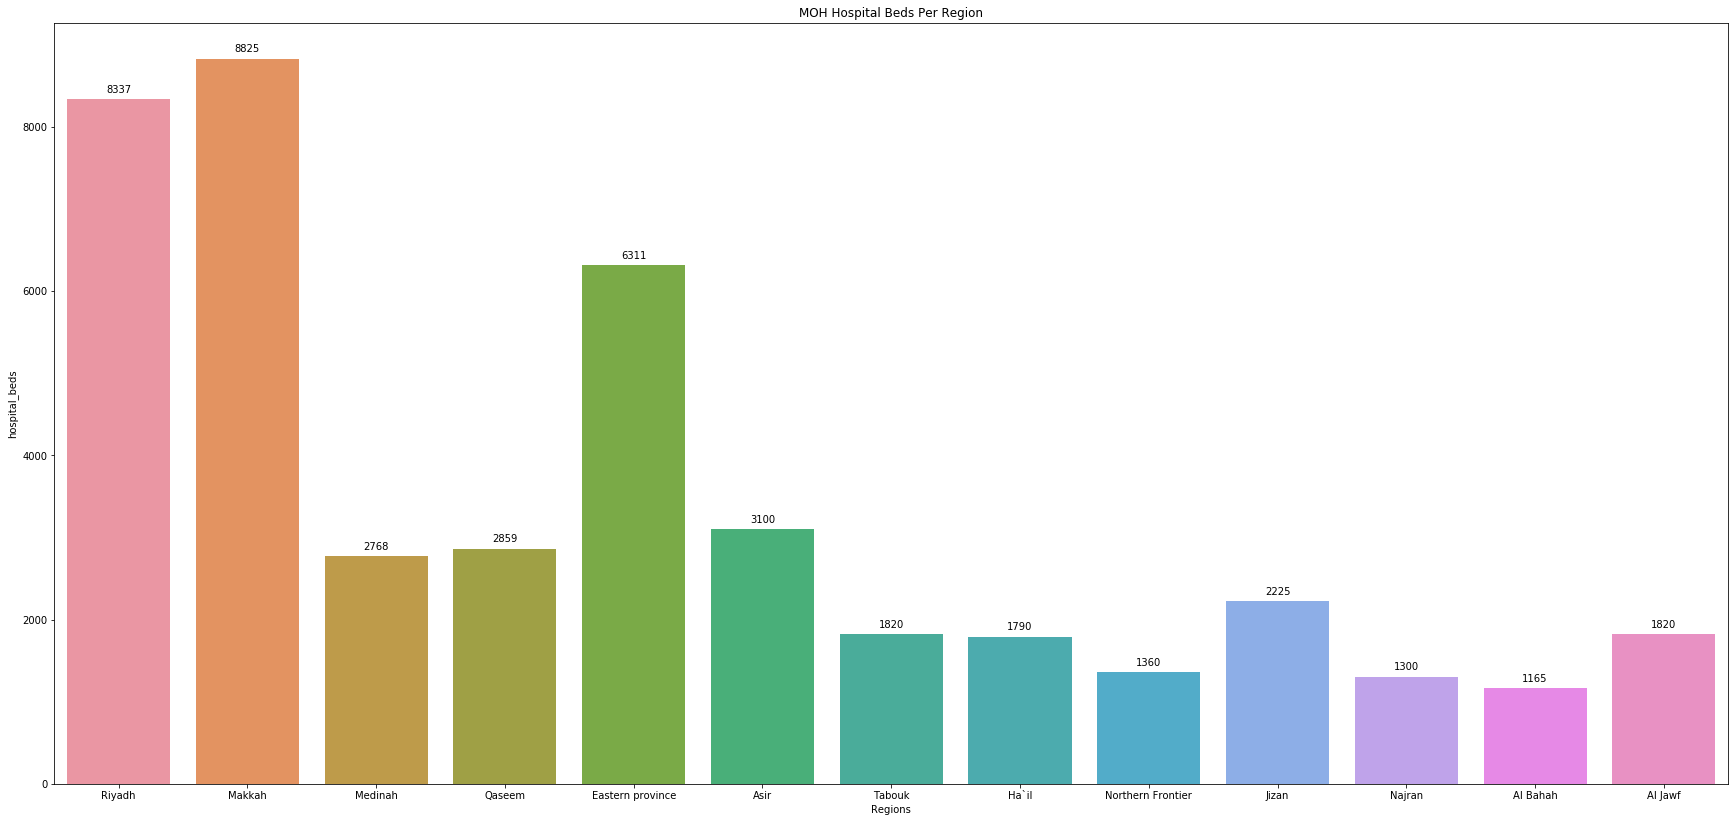

In [36]:
plt.figure(figsize = (30, 14))
plt.title('MOH Hospital Beds Per Region')

ax = sns.barplot(x="Regions", y="hospital_beds",  data=MOH_hospital_beds[MOH_hospital_beds.Regions != 'Total'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

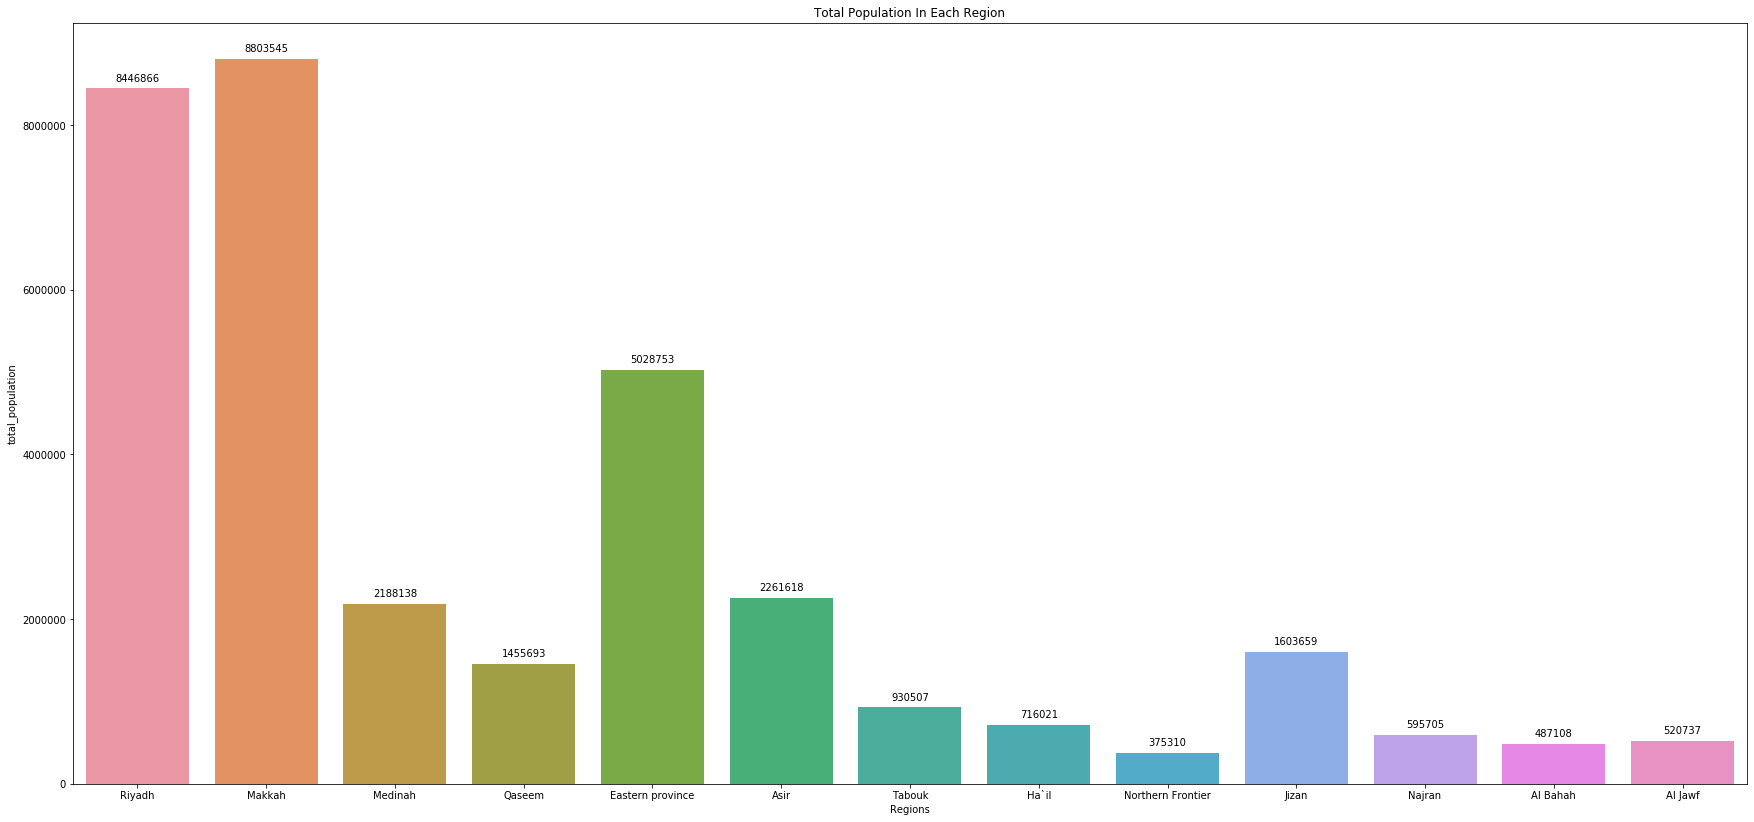

In [37]:
plt.figure(figsize = (30, 14))
plt.title('Total Population In Each Region')

ax = sns.barplot(x="Regions", y="total_population",  data=MOH_hospital_beds[MOH_hospital_beds.Regions != 'Total'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Cases In Saudi Arabia

In [75]:
saudi_cases_detailed = pd.read_excel('../data/corona_cases_ksa.xlsx')
saudi_cases_detailed

,date,city,province,total_cases,new_cases,from,nationality,map_name
0,2020-03-02,Qatif,Eastern province,1,1,Iran,Saudi,Ash Sharqiyah
1,2020-03-04,Qatif,Eastern province,2,1,Iran,Saudi,Ash Sharqiyah
2,2020-03-05,Qatif,Eastern province,5,3,Iran,Saudi,Ash Sharqiyah
3,2020-03-07,Qatif,Eastern province,6,1,Iran,Saudi,Ash Sharqiyah
4,2020-03-07,Qatif,Eastern province,7,1,Iraq,Saudi,Ash Sharqiyah
...,...,...,...,...,...,...,...,...
141,2020-03-24,Dammam,Eastern province,759,6,NaN,NaN,Ash Sharqiyah
142,2020-03-24,Jizan,Jizan,762,3,NaN,NaN,Jizan
143,2020-03-24,Kobar,Eastern province,764,2,NaN,NaN,Ash Sharqiyah
144,2020-03-24,Dhahran,Eastern province,766,2,NaN,NaN,Ash Sharqiyah


In [77]:
saudi_province = saudi_cases_detailed.groupby(['date', 'province']).agg({'new_cases': sum, 'total_cases': max}).reset_index()
saudi_province

,date,province,new_cases,total_cases
0,2020-03-02,Eastern province,1,1
1,2020-03-04,Eastern province,1,2
2,2020-03-05,Eastern province,3,5
3,2020-03-07,Eastern province,2,7
4,2020-03-08,Eastern province,4,11
...,...,...,...,...
60,2020-03-24,Jizan,3,762
61,2020-03-24,Makkah,82,644
62,2020-03-24,Medinah,1,767
63,2020-03-24,Najran,8,741


In [78]:
saudi_cases = pd.read_excel('../data/saudi_cases.xlsx')
saudi_cases = saudi_cases.fillna(0)
saudi_cases

,date,total_cases,new_cases,imported,local,unknown
0,2020-03-02,1,1,1.0,0.0,0.0
1,2020-03-03,1,0,0.0,0.0,0.0
2,2020-03-04,2,1,1.0,0.0,0.0
3,2020-03-05,5,3,3.0,0.0,0.0
4,2020-03-06,5,0,0.0,0.0,0.0
5,2020-03-07,7,2,2.0,0.0,0.0
6,2020-03-08,11,4,1.0,3.0,0.0
7,2020-03-09,15,4,3.0,1.0,0.0
8,2020-03-10,20,5,4.0,1.0,0.0
9,2020-03-11,45,25,3.0,22.0,0.0


In [70]:
saudi_cases['local'] = saudi_cases['local'] + saudi_cases['unknown']
saudi_cases['local'] = saudi_cases['local'] + saudi_cases['imported']

No handles with labels found to put in legend.


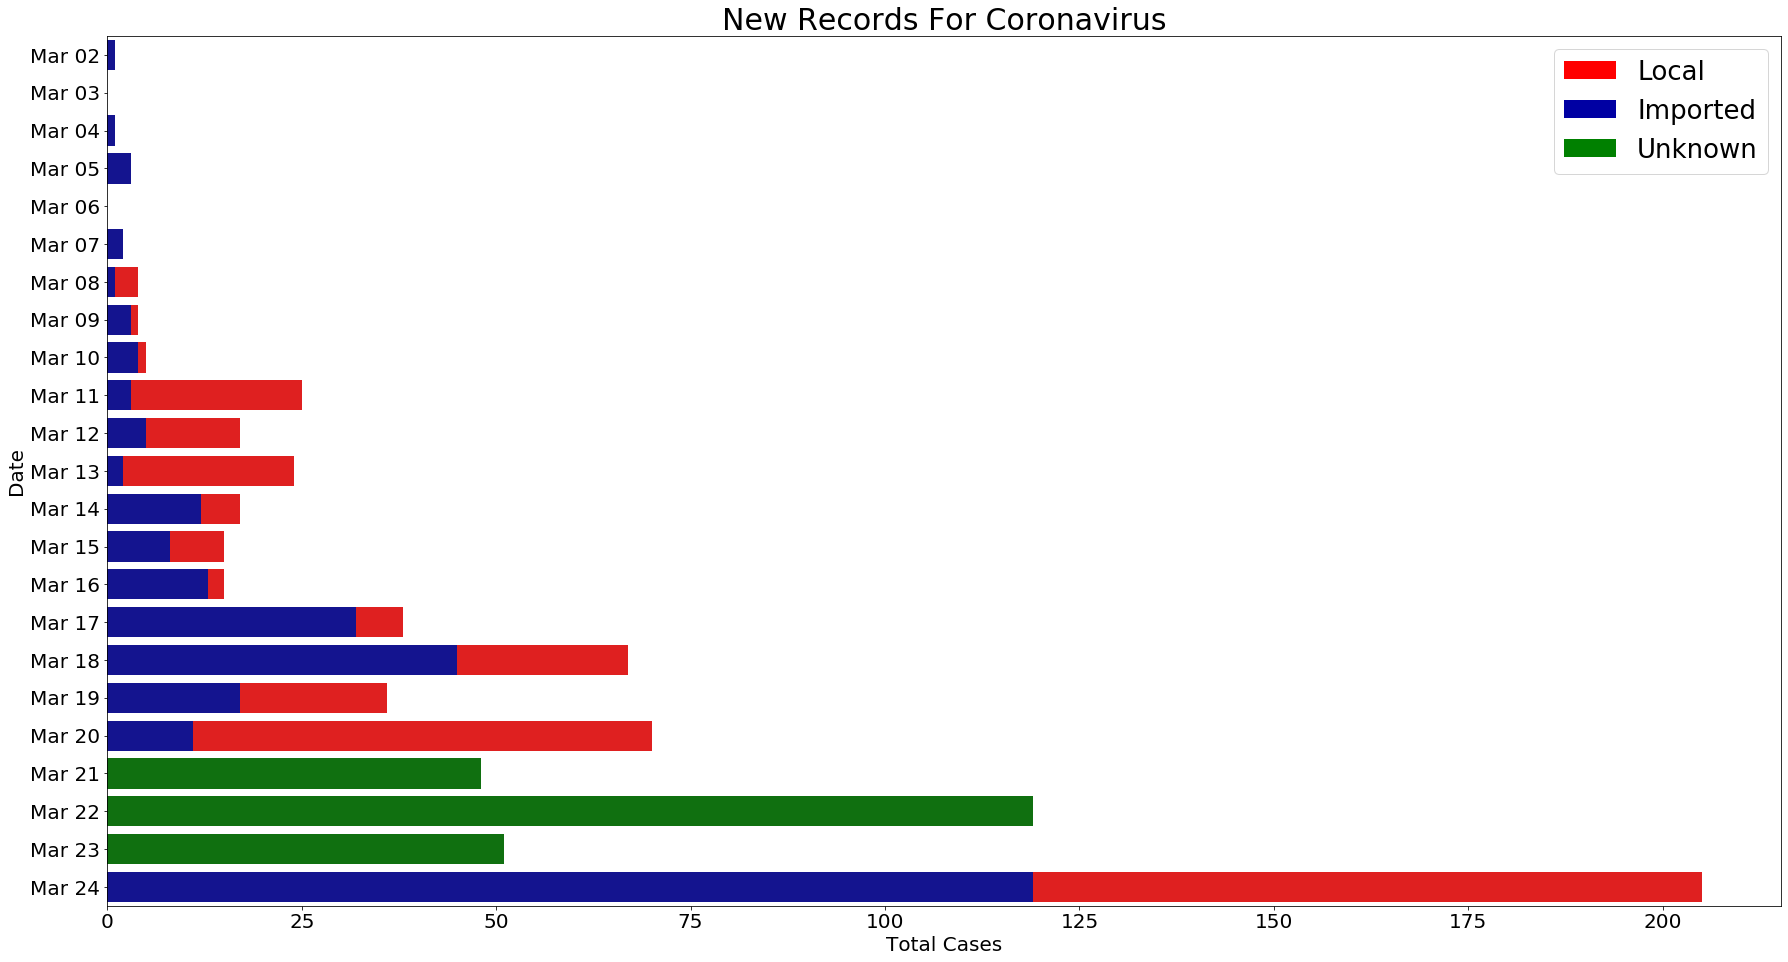

In [72]:


plt.figure(figsize = (30, 16))
plt.title('New Records For Coronavirus', fontsize=30)

sns.barplot(y='date', x='new_cases', data=saudi_cases, color='green', orient = 'h')

mid_plot = sns.barplot(y='date', x='local', data=saudi_cases, color='red', orient = 'h')

bottom_plot = sns.barplot(y='date', x='imported', data=saudi_cases, color='#0000A3', orient = 'h')



plt.yticks(fontsize =20)
plt.xticks(fontsize =20)
plt.ylabel('Date', fontsize =20)
plt.xlabel('Total Cases', fontsize =20)
plt.legend(fontsize=26)

y_dates = saudi_cases['date'].dt.strftime('%b %d').sort_values().unique()
bottom_plot.set_yticklabels(labels=y_dates, ha='right');



top_bar = plt.Rectangle((0, 0), 1, 1, fc='red')
mid_bar = plt.Rectangle((0, 0), 1, 1, fc='#0000A3')
idk = plt.Rectangle((0, 0), 1, 1, fc='green')

plt.legend([top_bar, mid_bar, idk], ['Local', 'Imported', 'Unknown'], loc='upper right', ncol=1, prop={'size':26});

